#  <a id='1-1'> STA220 - Exploratory Yelp Data Analysis

## Group: Anuraag Velamati, Yash Vekaria and Shubhankar Garg

In [1]:
import pandas as pd
import sys
import numpy as np
import os
from urllib.request import urlopen
import re
import string
import json
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.style.use('ggplot')
import seaborn as sns
from plotnine import *
from wordcloud import WordCloud 
from pyecharts.charts import Pie
from pyecharts import options as opts
import plotly.express as px
sys.path.insert(0, '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')
from bs4 import BeautifulSoup

In [2]:
sys.path.insert(0, '../Other_codes/')
sys.path.insert(0, '/usr/local/mysql/bin')
from db_utils import YelpDb
from Feature_Engineering import *

## Section I: Deciding on the Cities <a class="anchor" id="second-bullet"></a>

In [3]:
import requests
from bs4 import BeautifulSoup
import re
url = 'https://patch.com/california/lajolla/ca-cities-rank-among-best-big-cities-live'
response = requests.get(url)
page_content = response.content
soup = BeautifulSoup(page_content, 'html.parser')
second_ol = soup.select_one('.page__content ol:nth-of-type(2)')
cities_cleaned = [re.sub("[^A-Za-z ]", "", li.text) for li in second_ol.find_all('li')]
cities_to_display = cities_cleaned[:12]
print(f'The list of best big cities in California are: {cities_to_display}')

The list of best big cities in California are: ['San Diego ', 'San Francisco ', 'San Jose ', 'Sacramento ', 'Riverside ', 'Los Angeles ', 'Long Beach ', 'Anaheim ', 'Bakersfield ', 'Oakland ', 'Santa Ana ', 'Fresno ']


In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/List_of_largest_California_cities_by_population'
html_content = urlopen(url).read()
soup_parser = BeautifulSoup(html_content, 'html.parser')
data_table = soup_parser.find('table', class_="wikitable sortable")
cities_list = [row.find_all('td')[1].text.strip() for row in data_table.find_all('tr')[1:]]
print(f'The list of top 12 cities with most populations in California are: {cities_list[:12]}')


The list of top 12 cities with most populations in California are: ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Fresno', 'Sacramento', 'Long Beach', 'Oakland', 'Bakersfield', 'Anaheim', 'Stockton', 'Riverside']


In [5]:
Data_In_DataBase = YelpDb("yelp_db")
table_showing = "show TABLES;"
Data_In_DataBase.execute(table_showing)
Data_In_DataBase.fetch_all()

(('Anaheim_Table',),
 ('Bakersfield_Table',),
 ('Fresno_Table',),
 ('Long_Beach_Table',),
 ('Los_Angeles_Table',),
 ('Oakland_Table',),
 ('Riverside_Table',),
 ('Sacramento_Table',),
 ('San_Diego_Table',),
 ('San_Francisco_Table',),
 ('San_Jose_Table',),
 ('Santa_Ana_Table',))

### Section II: Read the databases created from crawling through the Yelp Website and convert them into dataframes

In [6]:
Sacramento_data = Data_In_DataBase.df_conversion("Sacramento_Table")
Oakland_data = Data_In_DataBase.df_conversion("Oakland_Table")
Riverside_data = Data_In_DataBase.df_conversion("Riverside_Table")
San_Diego_data = Data_In_DataBase.df_conversion("San_Diego_Table")
LA_data = Data_In_DataBase.df_conversion("Los_Angeles_Table")
Fresno_data = Data_In_DataBase.df_conversion("Fresno_Table")
Bakersfield_data = Data_In_DataBase.df_conversion("Bakersfield_Table")
Anaheim_data = Data_In_DataBase.df_conversion("Anaheim_Table")
Long_Beach_data = Data_In_DataBase.df_conversion("Long_Beach_Table")
Santa_Ana_data = Data_In_DataBase.df_conversion("Santa_Ana_Table")
San_Jose_data = Data_In_DataBase.df_conversion("San_Jose_Table")
San_Fransisco_data = Data_In_DataBase.df_conversion("San_Francisco_Table")


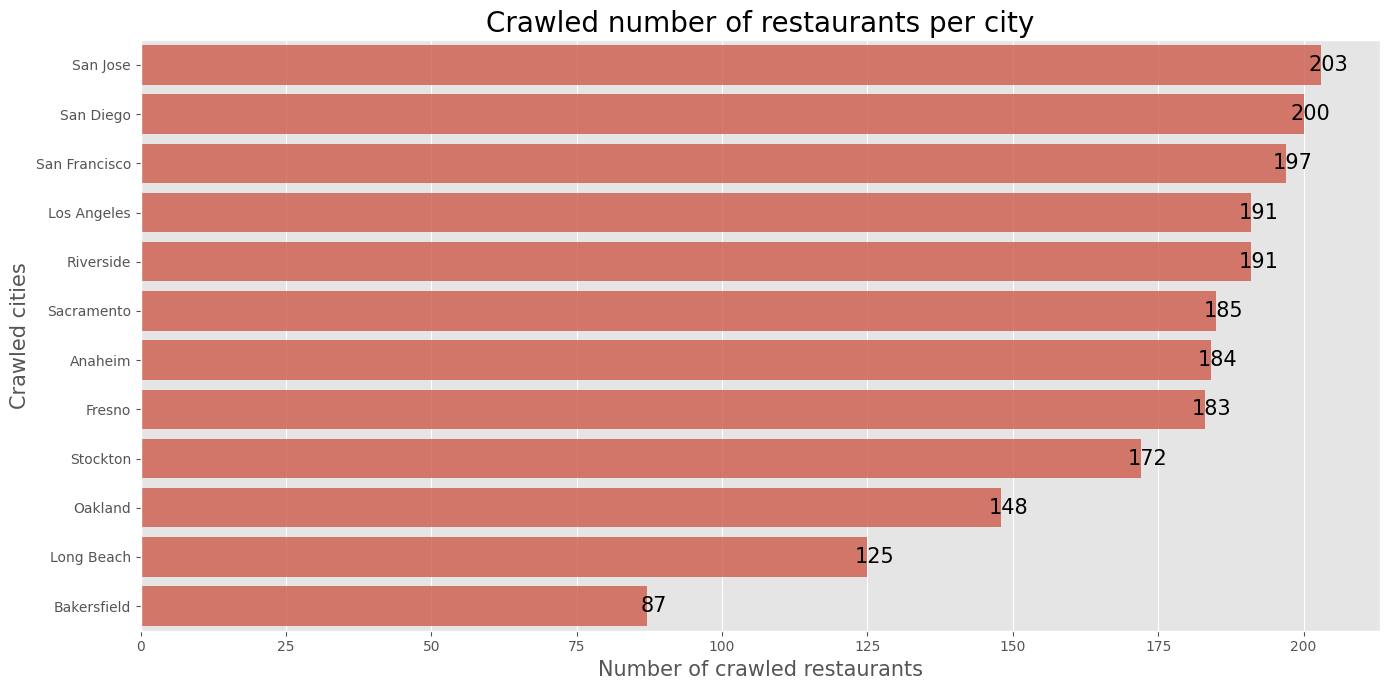

In [7]:
Data_of_Cities = cities_list[:12]
DataFrame_data = [LA_data.shape[0], San_Diego_data.shape[0], San_Jose_data.shape[0], San_Fransisco_data.shape[0],
               Fresno_data.shape[0], Sacramento_data.shape[0], Long_Beach_data.shape[0], Oakland_data.shape[0],
               Bakersfield_data.shape[0], Anaheim_data.shape[0], Santa_Ana_data.shape[0], Riverside_data.shape[0]]
comp_dict = {"Cities": Data_of_Cities, "Restaurants_number": DataFrame_data}
comp_df = pd.DataFrame(data=comp_dict).sort_values("Restaurants_number", ascending=False)
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(data=comp_df, y='Cities', x='Restaurants_number', alpha=0.8)
bar_plot.set_title("Crawled number of restaurants per city", fontsize=20)
bar_plot.set_xlabel("Number of crawled restaurants", fontsize=15)
bar_plot.set_ylabel("Crawled cities", fontsize=15)
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_width(), '.0f'), 
                      (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                      ha='center', va='center',
                      size=15, xytext=(5, 0), 
                      textcoords='offset points')
plt.tight_layout()
plt.show()

The number of restaurants in the above figure are not the total number of restaurants in the respective places, but the maximum number of places that Yelp let us scrap. From the figure, we could undertand that the restaurants in Bay Area, LA, etc. are much larger when compared to other cities such as Bakersfield, Long Beach, etc.

In [8]:
Combined_Dataframe = pd.concat([LA_data, San_Diego_data, San_Jose_data, San_Fransisco_data,
                        Fresno_data, Sacramento_data, Long_Beach_data, Oakland_data,
                        Bakersfield_data, Anaheim_data, Santa_Ana_data, Riverside_data]).reset_index(drop=True)

In [9]:
Combined_Dataframe = Combined_Dataframe.drop_duplicates()
Combined_Dataframe = Combined_Dataframe.reset_index()

In [10]:
exceptions(Combined_Dataframe, verbose=True)
Final_DataFrame_Combined = Combined_Dataframe.applymap(find_null)

No exceptions detected


In [12]:
Final_DataFrame_Combined=Final_DataFrame_Combined.drop(0)
Final_DataFrame_Combined.head()

index              Name                                      Address  \
1     1           Ka'teen         6516 Selma Ave Los Angeles, CA 90028   
2     2    The Front Yard  4222 Vineland Ave North Hollywood, CA 91602   
3     3        Anju House       234 S Oxford Ave Los Angeles, CA 90004   
4     4  Met Her At A Bar      759 S La Brea Ave Los Angeles, CA 90036   
5     5       Great White   244 N Larchmont Blvd Los Angeles, CA 90004   

                                            Category    Price  \
1         Mexican, Cocktail Bars, Breakfast & Brunch  Unknown   
2  New American, Breakfast & Brunch, Beer, Wine &...       $$   
3                   Korean, Bars, Tapas/Small Plates  Unknown   
4            Cafes, Breakfast & Brunch, New American       $$   
5    New American, Breakfast & Brunch, Cocktail Bars       $$   

            Rating Reviews                           Mon  \
1    (678 reviews)     4.0                        Closed   
2  (3,513 reviews)     4.0            7:00 AM - 11:00 AM   
3    (183 reviews)     4.3  5:00 PM - 2:00 AM (Next day)   
4  (2,581 reviews)     4.4             8:00 AM - 3:00 PM   
5    (552 reviews)     4.1            8:00 AM - 10:00 PM   

                            Tue                           Wed  \
1             6:00 PM - 9:00 PM             6:00 PM - 9:00 PM   
2            7:00 AM - 11:00 AM            7:00 AM - 11:00 AM   
3  5:00 PM - 2:00 AM (Next day)  5:00 PM - 2:00 AM (Next day)   
4             8:00 AM - 3:00 PM             8:00 AM - 3:00 PM   
5            8:00 AM - 10:00 PM            8:00 AM - 10:00 PM   

                            Thu                           Fri  \
1             6:00 PM - 9:00 PM            6:00 PM - 11:00 PM   
2            7:00 AM - 11:00 AM            7:00 AM - 11:00 AM   
3  5:00 PM - 2:00 AM (Next day)  5:00 PM - 2:00 AM (Next day)   
4             8:00 AM - 3:00 PM             8:00 AM - 3:00 PM   
5            8:00 AM - 10:00 PM            8:00 AM - 10:00 PM   

                             Sat                             Sun  
1             6:00 PM - 11:00 PM              11:30 AM - 2:30 PM  
2             7:00 AM - 10:30 PM              7:00 AM - 10:30 PM  
3  11:00 AM - 2:00 AM (Next day)  11:00 AM - 12:00 AM (Next day)  
4              8:00 AM - 4:00 PM               8:00 AM - 4:00 PM  
5             8:00 AM - 10:00 PM              8:00 AM - 10:00 PM

In [13]:

Final_DataFrame_Combined['ZIP'] = Final_DataFrame_Combined.Address.apply(get_ZIP)

In [14]:
Final_DataFrame_Combined.Price.value_counts()

Price
$$         1233
Unknown     428
$$$         139
$           106
$$$$         42
Name: count, dtype: int64

In [45]:
def extract_ratings(rating_str):
    try:
        return int(''.join(re.findall(r'\d+', rating_str)).replace(',', ''))
    except (ValueError, AttributeError):
        return 0

Final_DataFrame_Combined['Rating'] = Final_DataFrame_Combined['Rating'].apply(extract_ratings)
Final_DataFrame_Combined.head()

index              Name                                      Address  \
1     1           Ka'teen         6516 Selma Ave Los Angeles, CA 90028   
2     2    The Front Yard  4222 Vineland Ave North Hollywood, CA 91602   
3     3        Anju House       234 S Oxford Ave Los Angeles, CA 90004   
4     4  Met Her At A Bar      759 S La Brea Ave Los Angeles, CA 90036   
5     5       Great White   244 N Larchmont Blvd Los Angeles, CA 90004   

                                            Category    Price  Rating Reviews  \
1         Mexican, Cocktail Bars, Breakfast & Brunch  Unknown     678     4.0   
2  New American, Breakfast & Brunch, Beer, Wine &...       $$    3513     4.0   
3                   Korean, Bars, Tapas/Small Plates  Unknown     183     4.3   
4            Cafes, Breakfast & Brunch, New American       $$    2581     4.4   
5    New American, Breakfast & Brunch, Cocktail Bars       $$     552     4.1   

                            Mon                           Tue  \
1                        Closed             6:00 PM - 9:00 PM   
2            7:00 AM - 11:00 AM            7:00 AM - 11:00 AM   
3  5:00 PM - 2:00 AM (Next day)  5:00 PM - 2:00 AM (Next day)   
4             8:00 AM - 3:00 PM             8:00 AM - 3:00 PM   
5            8:00 AM - 10:00 PM            8:00 AM - 10:00 PM   

                            Wed                           Thu  \
1             6:00 PM - 9:00 PM             6:00 PM - 9:00 PM   
2            7:00 AM - 11:00 AM            7:00 AM - 11:00 AM   
3  5:00 PM - 2:00 AM (Next day)  5:00 PM - 2:00 AM (Next day)   
4             8:00 AM - 3:00 PM             8:00 AM - 3:00 PM   
5            8:00 AM - 10:00 PM            8:00 AM - 10:00 PM   

                            Fri                            Sat  \
1            6:00 PM - 11:00 PM             6:00 PM - 11:00 PM   
2            7:00 AM - 11:00 AM             7:00 AM - 10:30 PM   
3  5:00 PM - 2:00 AM (Next day)  11:00 AM - 2:00 AM (Next day)   
4             8:00 AM - 3:00 PM              8:00 AM - 4:00 PM   
5            8:00 AM - 10:00 PM             8:00 AM - 10:00 PM   

                              Sun        ZIP  
1              11:30 AM - 2:30 PM   CA 90028  
2              7:00 AM - 10:30 PM   CA 91602  
3  11:00 AM - 12:00 AM (Next day)   CA 90004  
4               8:00 AM - 4:00 PM   CA 90036  
5              8:00 AM - 10:00 PM   CA 90004

### Section III: Data analysis and visualization

To understand how the distribution of restaurants is in the above selected locations, we look at the following:
- Part I: Restaurants ratings distribution analysis
- Part II: Restaurants categorical analysis
- Part III: Restaurants reviews distribution analysis based on cities
- Part IV: Restaurants geo-spatial analysis
- Part V: Top 25 reviewed restaurants

After this above workflow, we expect to gain strong data insights from graphical methods. 

### Part I: Restaurants ratings distribution analysis 

- 1. Overall ratings distributions.
- 2. Individual cities ratings distributions.

In [15]:
class Distribution_plot:
    def __init__(self, df):
        self.df = df
    def plot(self, font_size, title, text_height):
        counts = self.df['Reviews'].value_counts().sort_index()
        ax = sns.barplot(x=counts.index, y=counts.values, alpha=0.8)
        plt.title(title, fontsize=font_size)
        plt.xlabel("Ratings", fontsize=font_size)
        plt.ylabel("# of Restaurants", fontsize=font_size)
        for rect, count in zip(ax.patches, counts.values):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height + text_height, count,
                    ha='center', va='bottom')         
    def clean_each_city_df(self):
        exceptions(self.df)
        clean_df = self.df.applymap(find_null)
        return clean_df

In [59]:
Final_DataFrame_Combined

index                            Name  \
1        1                         Ka'teen   
2        2                  The Front Yard   
3        3                      Anju House   
4        4                Met Her At A Bar   
5        5                     Great White   
...    ...                             ...   
1944  2061              Brandon's Diner Jr   
1945  2062             Little Green Onions   
1946  2063          Riverside Thai Kitchen   
1947  2064  Safe Haus Craft Beer & Kitchen   
1948  2065                    Jefrox Adobo   

                                            Address  \
1              6516 Selma Ave Los Angeles, CA 90028   
2       4222 Vineland Ave North Hollywood, CA 91602   
3            234 S Oxford Ave Los Angeles, CA 90004   
4           759 S La Brea Ave Los Angeles, CA 90036   
5        244 N Larchmont Blvd Los Angeles, CA 90004   
...                                             ...   
1944               3900 Main St Riverside, CA 92501   
1945          6723 Brockton Ave Riverside, CA 92506   
1946        7755 California Ave Riverside, CA 92504   
1947  12125 Day St Ste N201 Moreno Valley, CA 92557   
1948         2561 Grambling Way Riverside, CA 92507   

                                               Category    Price  Rating  \
1            Mexican, Cocktail Bars, Breakfast & Brunch  Unknown     678   
2     New American, Breakfast & Brunch, Beer, Wine &...       $$    3513   
3                      Korean, Bars, Tapas/Small Plates  Unknown     183   
4               Cafes, Breakfast & Brunch, New American       $$    2581   
5       New American, Breakfast & Brunch, Cocktail Bars       $$     552   
...                                                 ...      ...     ...   
1944                          Diners, Mexican, American       $$     122   
1945                 Breakfast & Brunch, Mexican, Salad       $$     596   
1946                                               Thai        $     483   
1947                                         Gastropubs       $$     409   
1948                   Asian Fusion, Caterers, Filipino  Unknown      55   

     Reviews                           Mon                           Tue  \
1        4.0                        Closed             6:00 PM - 9:00 PM   
2        4.0            7:00 AM - 11:00 AM            7:00 AM - 11:00 AM   
3        4.3  5:00 PM - 2:00 AM (Next day)  5:00 PM - 2:00 AM (Next day)   
4        4.4             8:00 AM - 3:00 PM             8:00 AM - 3:00 PM   
5        4.1            8:00 AM - 10:00 PM            8:00 AM - 10:00 PM   
...      ...                           ...                           ...   
1944     3.9             7:30 AM - 2:00 PM             7:30 AM - 2:00 PM   
1945     3.8                        Closed             7:00 AM - 8:00 PM   
1946     4.2            11:00 AM - 2:00 PM            11:00 AM - 2:00 PM   
1947     4.6            3:00 PM - 10:30 PM            3:00 PM - 10:30 PM   
1948     4.7            12:00 PM - 8:00 PM            12:00 PM - 8:00 PM   

                               Wed                           Thu  \
1                6:00 PM - 9:00 PM             6:00 PM - 9:00 PM   
2               7:00 AM - 11:00 AM            7:00 AM - 11:00 AM   
3     5:00 PM - 2:00 AM (Next day)  5:00 PM - 2:00 AM (Next day)   
4                8:00 AM - 3:00 PM             8:00 AM - 3:00 PM   
5               8:00 AM - 10:00 PM            8:00 AM - 10:00 PM   
...                            ...                           ...   
1944             7:30 AM - 2:00 PM             7:30 AM - 2:00 PM   
1945             7:00 AM - 8:00 PM             7:00 AM - 9:00 PM   
1946            11:00 AM - 2:00 PM            11:00 AM - 2:00 PM   
1947            3:00 PM - 10:30 PM            3:00 PM - 10:30 PM   
1948            12:00 PM - 8:00 PM            12:00 PM - 8:00 PM   

                                Fri                             Sat  \
1                6:00 PM - 11:00 PM              6:00 PM - 11:00 PM   
2     

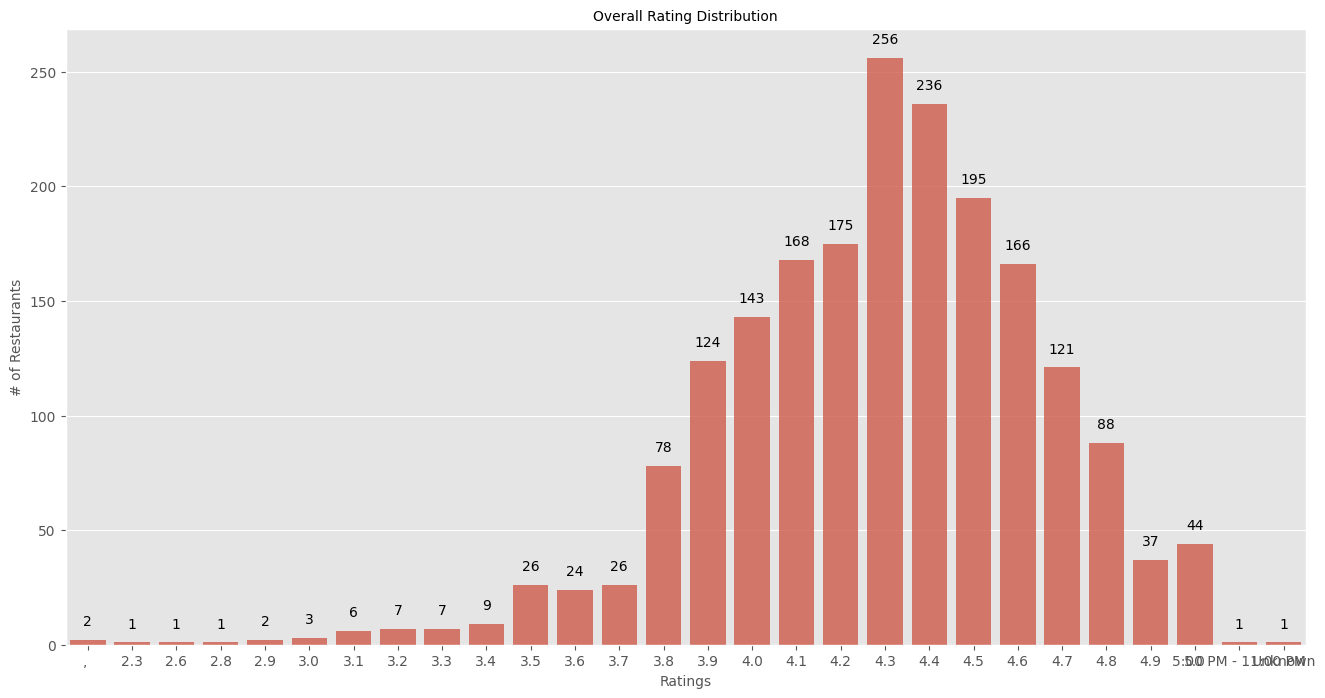

In [17]:
plt.figure(figsize=(16, 8))
ratdist = Distribution_plot(Final_DataFrame_Combined)
ratdist.plot(font_size=10,title="Overall Rating Distribution",text_height=5)

**Observation and comments:**

From the above plot:
- 1.The overall restaurants ratings distribution was **left skewed**, which means majority of restaurants have ratings between 3.5 to 5.0. 

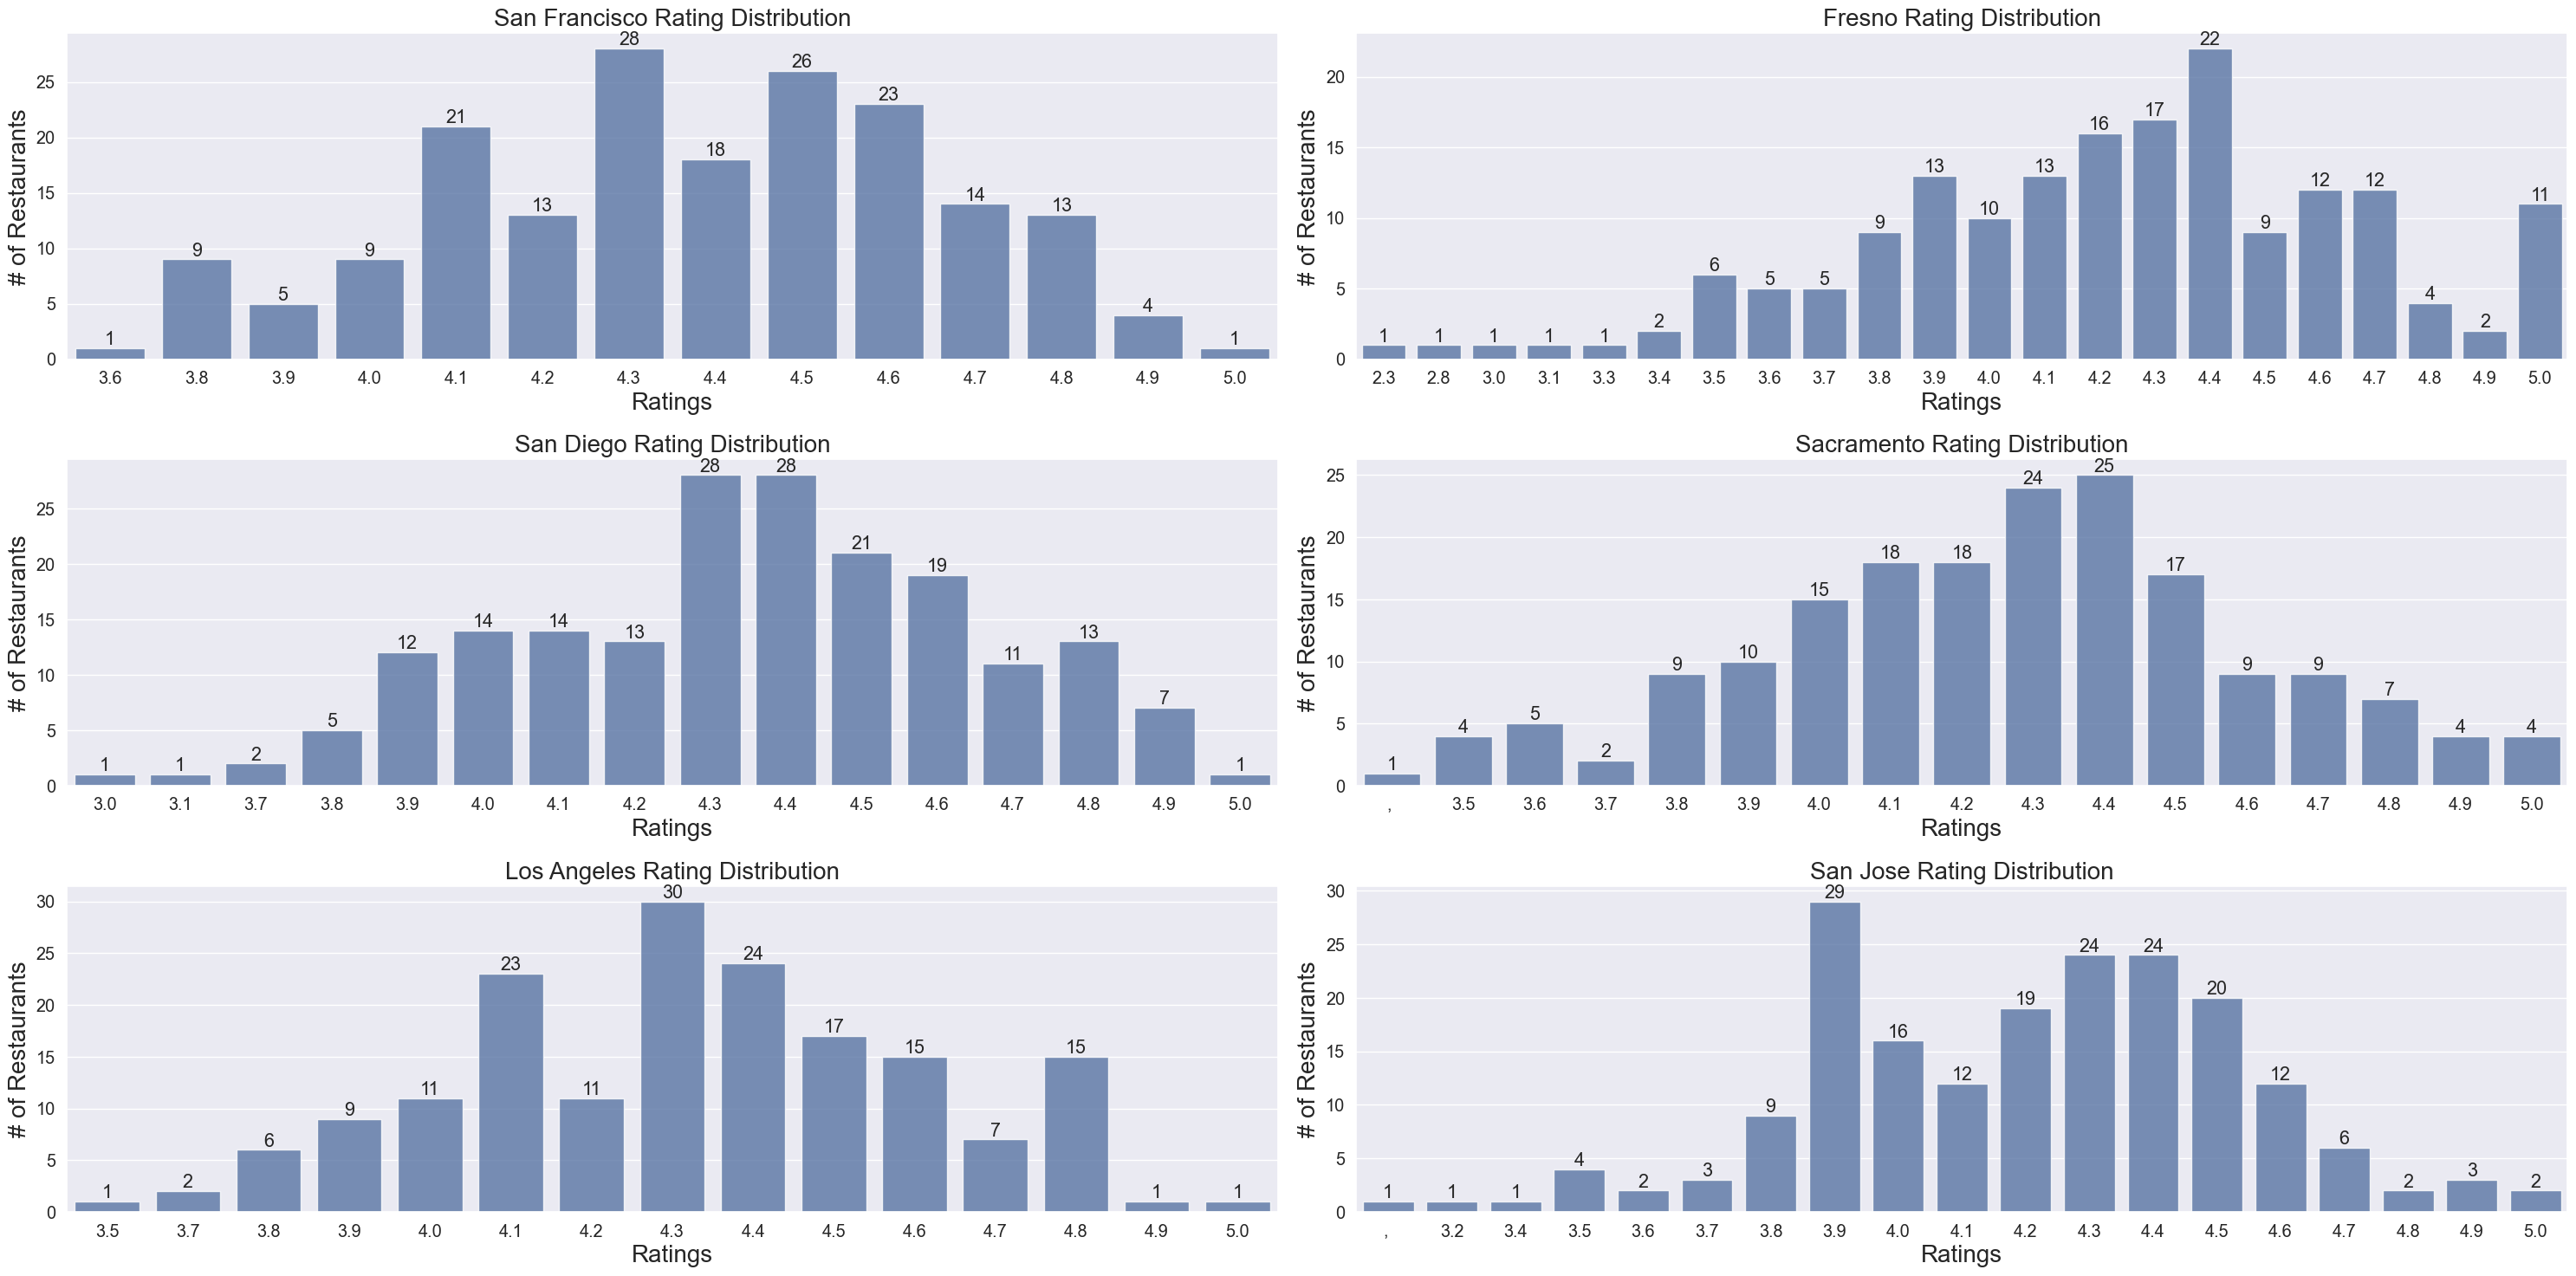

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': (30, 15)})
sns.set(font_scale=1.3)
plt.subplots(3, 2, figsize=(30, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.4)
city_data_dict = {
    "San Francisco": San_Fransisco_data,
    "Fresno": Fresno_data,
    "San Diego": San_Diego_data,
    "Sacramento": Sacramento_data,
    "Los Angeles": LA_data,
    "San Jose": San_Jose_data,
}
jumbled_cities_order = [
    "San Francisco",
    "Fresno",
    "San Diego",
    "Sacramento",
    "Los Angeles",
    "San Jose",
]
for index, city_name in enumerate(jumbled_cities_order):
    plt.subplot(3, 2, index + 1)
    current_city_data = city_data_dict[city_name]
    ratdist = Distribution_plot(current_city_data)
    clean_city_data = ratdist.clean_each_city_df()
    ratdist.plot(20, f"{city_name} Rating Distribution", text_height=0)
plt.tight_layout()
plt.show()


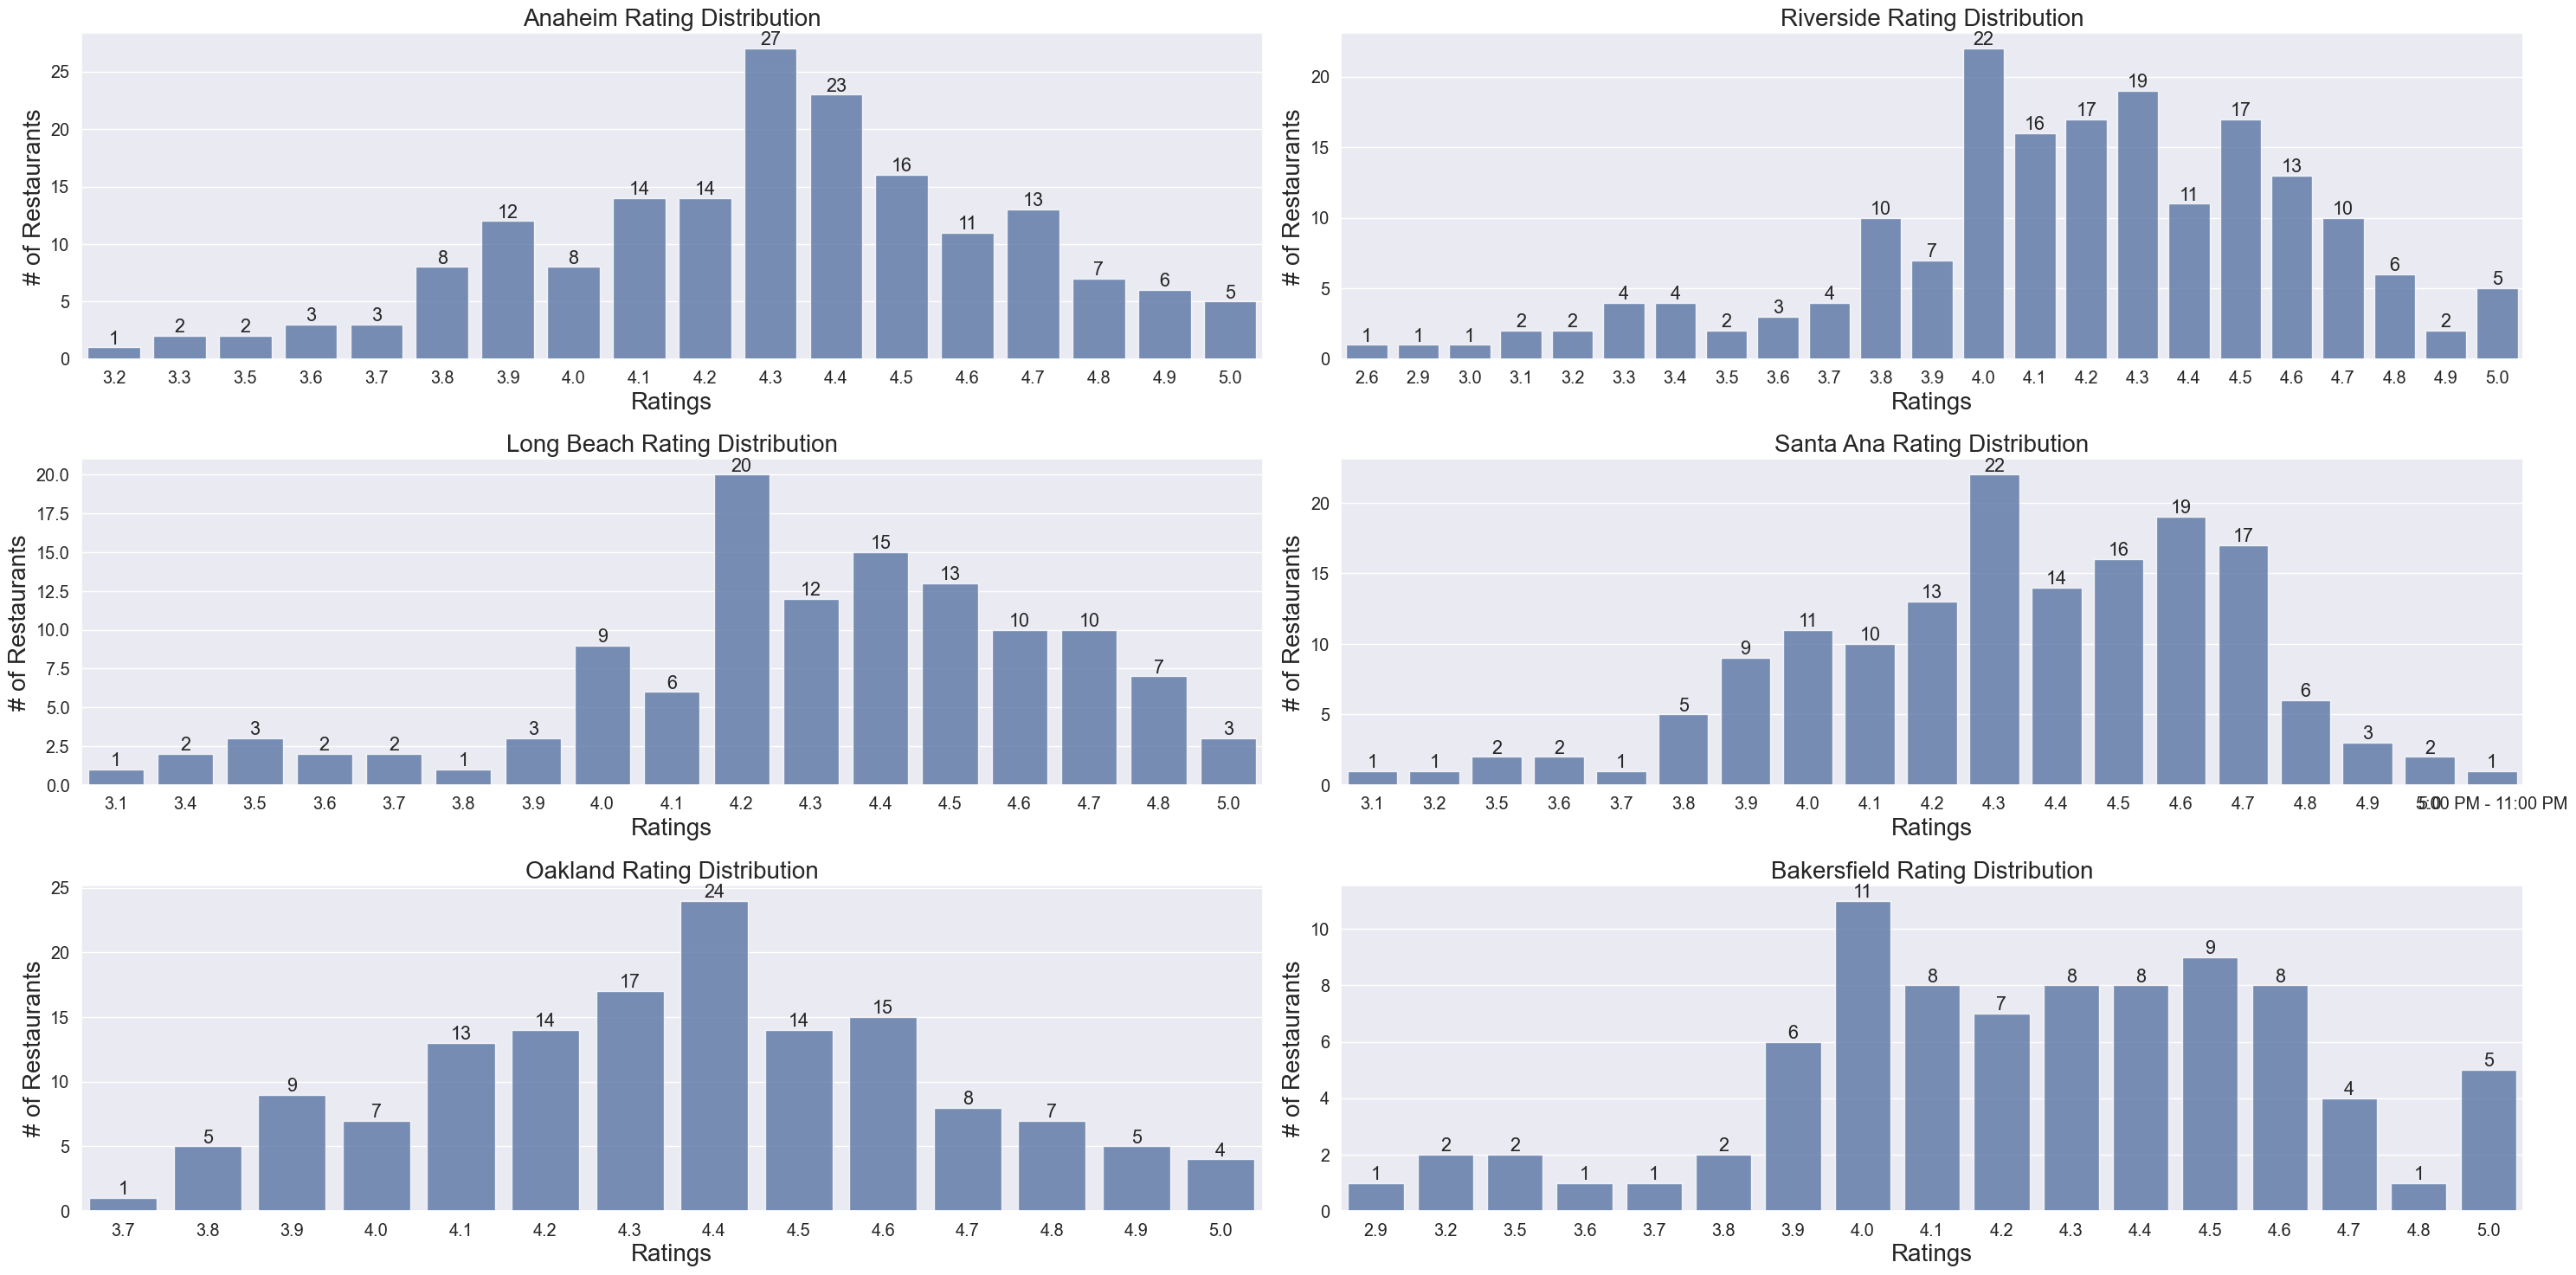

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': (30, 15)})
sns.set(font_scale=1.3)
plt.subplots(3, 2, figsize=(30, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.7)
city_plot_data = {
    "Long Beach": Long_Beach_data,
    "Oakland": Oakland_data,
    "Bakersfield": Bakersfield_data,
    "Anaheim": Anaheim_data,
    "Santa Ana": Santa_Ana_data,
    "Riverside": Riverside_data,
}
city_order = [
    "Anaheim",
    "Riverside",
    "Long Beach",
    "Santa Ana",
    "Oakland",
    "Bakersfield",
]
for index, city_name in enumerate(city_order):
    plt.subplot(3, 2, index + 1)
    current_city_data = city_plot_data[city_name]
    ratdist = Distribution_plot(current_city_data)
    clean_city_data = ratdist.clean_each_city_df()
    ratdist.plot(20, f"{city_name} Rating Distribution", text_height=0)
plt.tight_layout()
plt.show()


**Observation and comments:**

From the above plot:
- 1. Generally, Los Angeles, San Diego, San Francisco, Oakland have lowest portion of restaurants with rating below 4.0.
- 2. Fresno, Bakersfield, and Riverside have more frequency of low ratings restaurants compared with other cities. 
- 3. Majority of ratings are 3.5 to 4.5, we saw the geneous of Yelp reviewers on these restaurants.
- 4. Bakersfield and Riverside had relatively uniform rating distributions.

### Part II: Restaurants categorical analysis 


In [68]:
import pandas as pd
import re
import numpy as np
import os
import nltk
import string
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
from collections import defaultdict
from nltk.corpus import stopwords
from Feature_Engineering import *
nltk.download('stopwords')

class CategoryFrequencyPlotter:
    def __init__(self, dataframe, punctuation_to_remove=string.punctuation):
        self.regex_pattern = fr"[{punctuation_to_remove}]"
        self.frequency_dict = {}
        self.df = dataframe
        self.category_ratings = defaultdict(list)
        self.category_avg_ratings = {}
        self.category_reviews = defaultdict(int)
        
    def _split_clean_join(self, text):
        try:
            split_text = re.split(self.regex_pattern, text.strip())
        except:
            raise Exception(f'Error: The text "{text}" is not a string')
        for word in split_text:
            cleaned_word = word.strip()
            if cleaned_word in self.frequency_dict:
                self.frequency_dict[cleaned_word] += 1
            else:
                self.frequency_dict[cleaned_word] = 0 if cleaned_word == '' else 1
        return " ".join(split_text)
    
    def count_categories(self):
        self.df[['Category']].applymap(self._split_clean_join)  
        self.frequency_dict.pop('Unknown', None) 
        self.frequency_dict.pop('', None)  
        return self.frequency_dict
    
    def plot_category_frequencies(self, top_n, title_font_size, chart_title, include_overall=False, show_details=False):
        cat_freq_dataframe = pd.DataFrame(list(self.frequency_dict.items()), columns=['Category', 'Count']).sort_values('Count', ascending=False)
        total_categories = cat_freq_dataframe.Category.nunique()
        if show_details:
            print(f"Total {total_categories} unique word categories found in Yelp restaurant descriptions")

        top_categories = cat_freq_dataframe.head(top_n)
        if include_overall:
            plt.figure(figsize=(20, 14))
        sns.barplot(x='Count', y='Category', data=top_categories, alpha=0.8)
        plt.title(chart_title, fontsize=title_font_size)
        plt.xlabel('Frequency', fontsize=title_font_size)
        plt.ylabel('Categories', fontsize=title_font_size)

        ax = plt.gca()
        for patch in ax.patches:
            ax.text(patch.get_x() + patch.get_width() + 5, patch.get_y() + patch.get_height() / 2, patch.get_width(), ha='left')

    def calculate_average_ratings(self):
        for _, row in self.df.iterrows():
            categories = row['Category'].split(',')
            try:
                rating = float(row['Reviews'])
            except:
                continue
            for category in categories:
                self.category_ratings[category.strip()].append(rating)
        self.category_avg_ratings = {category: sum(ratings)/len(ratings) for category, ratings in self.category_ratings.items()}

    def calculate_total_reviews(self):
        for _, row in self.df.iterrows():
            categories = row['Category'].split(',')
            try:
                no_rating = int(row['Rating'])
            except:
                continue
            for category in categories:
                category = category.strip()
                self.category_reviews[category] += no_rating
            #print(self.category_reviews)
        #self.category_ratings = {category: sum(ratings) for category, ratings in self.category_ratings.items()}
    
    def plot_total_reviews(self, top_n, title_font_size, chart_title):
        self.calculate_total_reviews()
        cat_avg_rating_df = pd.DataFrame(list(self.category_reviews.items()), columns=['Category', 'Total Reviews']).sort_values('Total Reviews', ascending=False)
        #plt.figure(figsize=(5, 4))
        top_categories = cat_avg_rating_df.head(top_n)
        sns.barplot(x='Total Reviews', y='Category', data=top_categories, alpha=0.8)
        plt.title(chart_title, fontsize=title_font_size)
        plt.xlabel('Total Reviews', fontsize=title_font_size - 5)
        plt.ylabel('Category', fontsize=title_font_size - 5)
        plt.tight_layout()

    def plot_average_ratings(self, top_n, title_font_size, chart_title):
        self.calculate_average_ratings()
        cat_avg_rating_df = pd.DataFrame(list(self.category_avg_ratings.items()), columns=['Category', 'Average Rating']).sort_values('Average Rating', ascending=False)
        #plt.figure(figsize=(5, 4))
        top_categories = cat_avg_rating_df.head(top_n)
        sns.barplot(x='Average Rating', y='Category', data=top_categories, alpha=0.8)
        plt.title(chart_title, fontsize=title_font_size)
        plt.xlabel('Average Rating', fontsize=title_font_size - 5)
        plt.ylabel('Category', fontsize=title_font_size - 5)
        plt.tight_layout()
    
    def generate_wordcloud(self, max_words=30):
        wordcloud_gen = WordCloud(
            background_color='white',
            stopwords=set(stopwords.words("english")),
            scale=10,
            max_words=max_words,
            max_font_size=40
        ).generate_from_frequencies(frequencies=self.frequency_dict)
        
        plt.figure(figsize=(15, 15))
        plt.axis('off')
        plt.imshow(wordcloud_gen, interpolation="bilinear")


[nltk_data] Downloading package stopwords to /Users/av/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total 209 unique word categories found in Yelp restaurant descriptions


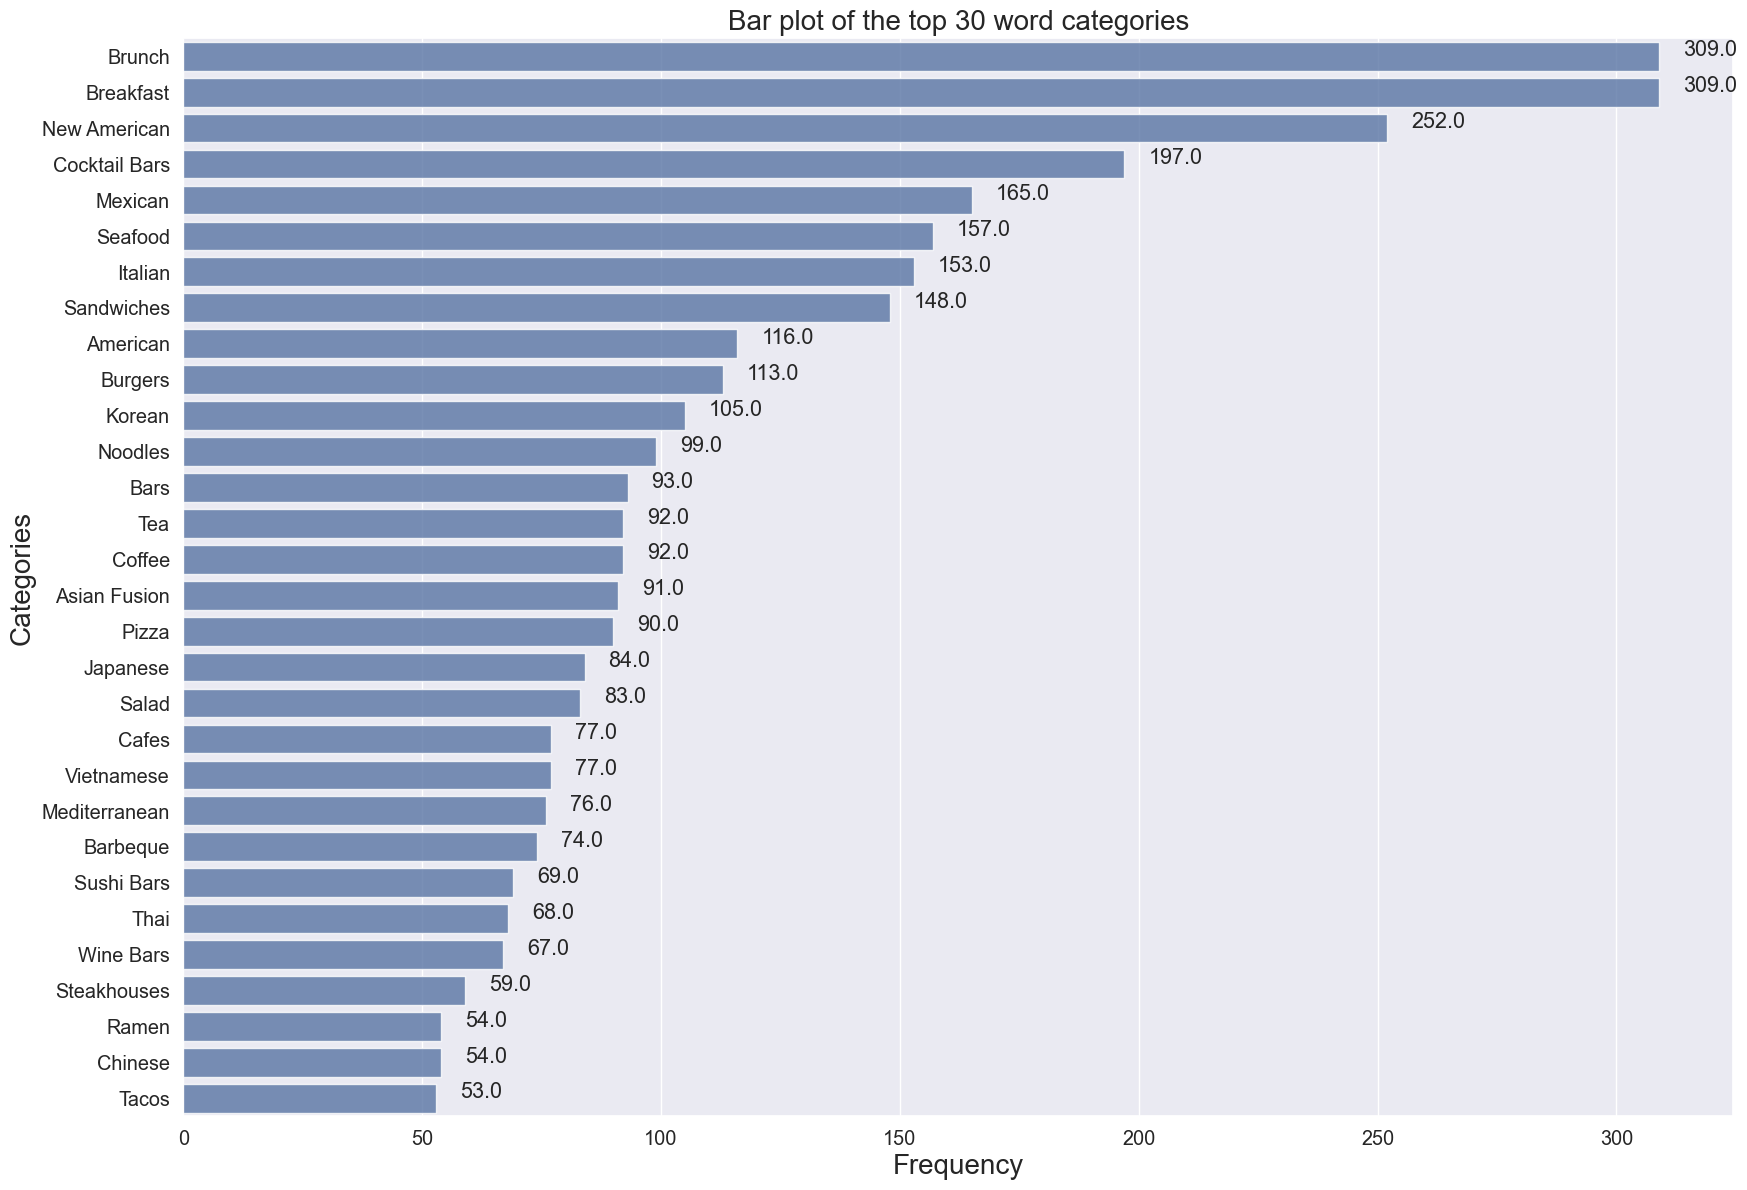

In [42]:
sns.set(rc={'figure.figsize':(25,25)})
sns.set(font_scale=1.3)
Frequecy_of_categories = CategoryFrequencyPlotter(Final_DataFrame_Combined)
Frequecy_of_categories.count_categories()
Frequecy_of_categories.plot_category_frequencies(30, 20, "Bar plot of the top 30 word categories", include_overall=True, show_details=True)

The visualization gave us an insight that quick snack places, such as brunch, breakfast, cocktail bars are some of the categories of restaurants that are most frequent in the full data of restaurants collected.

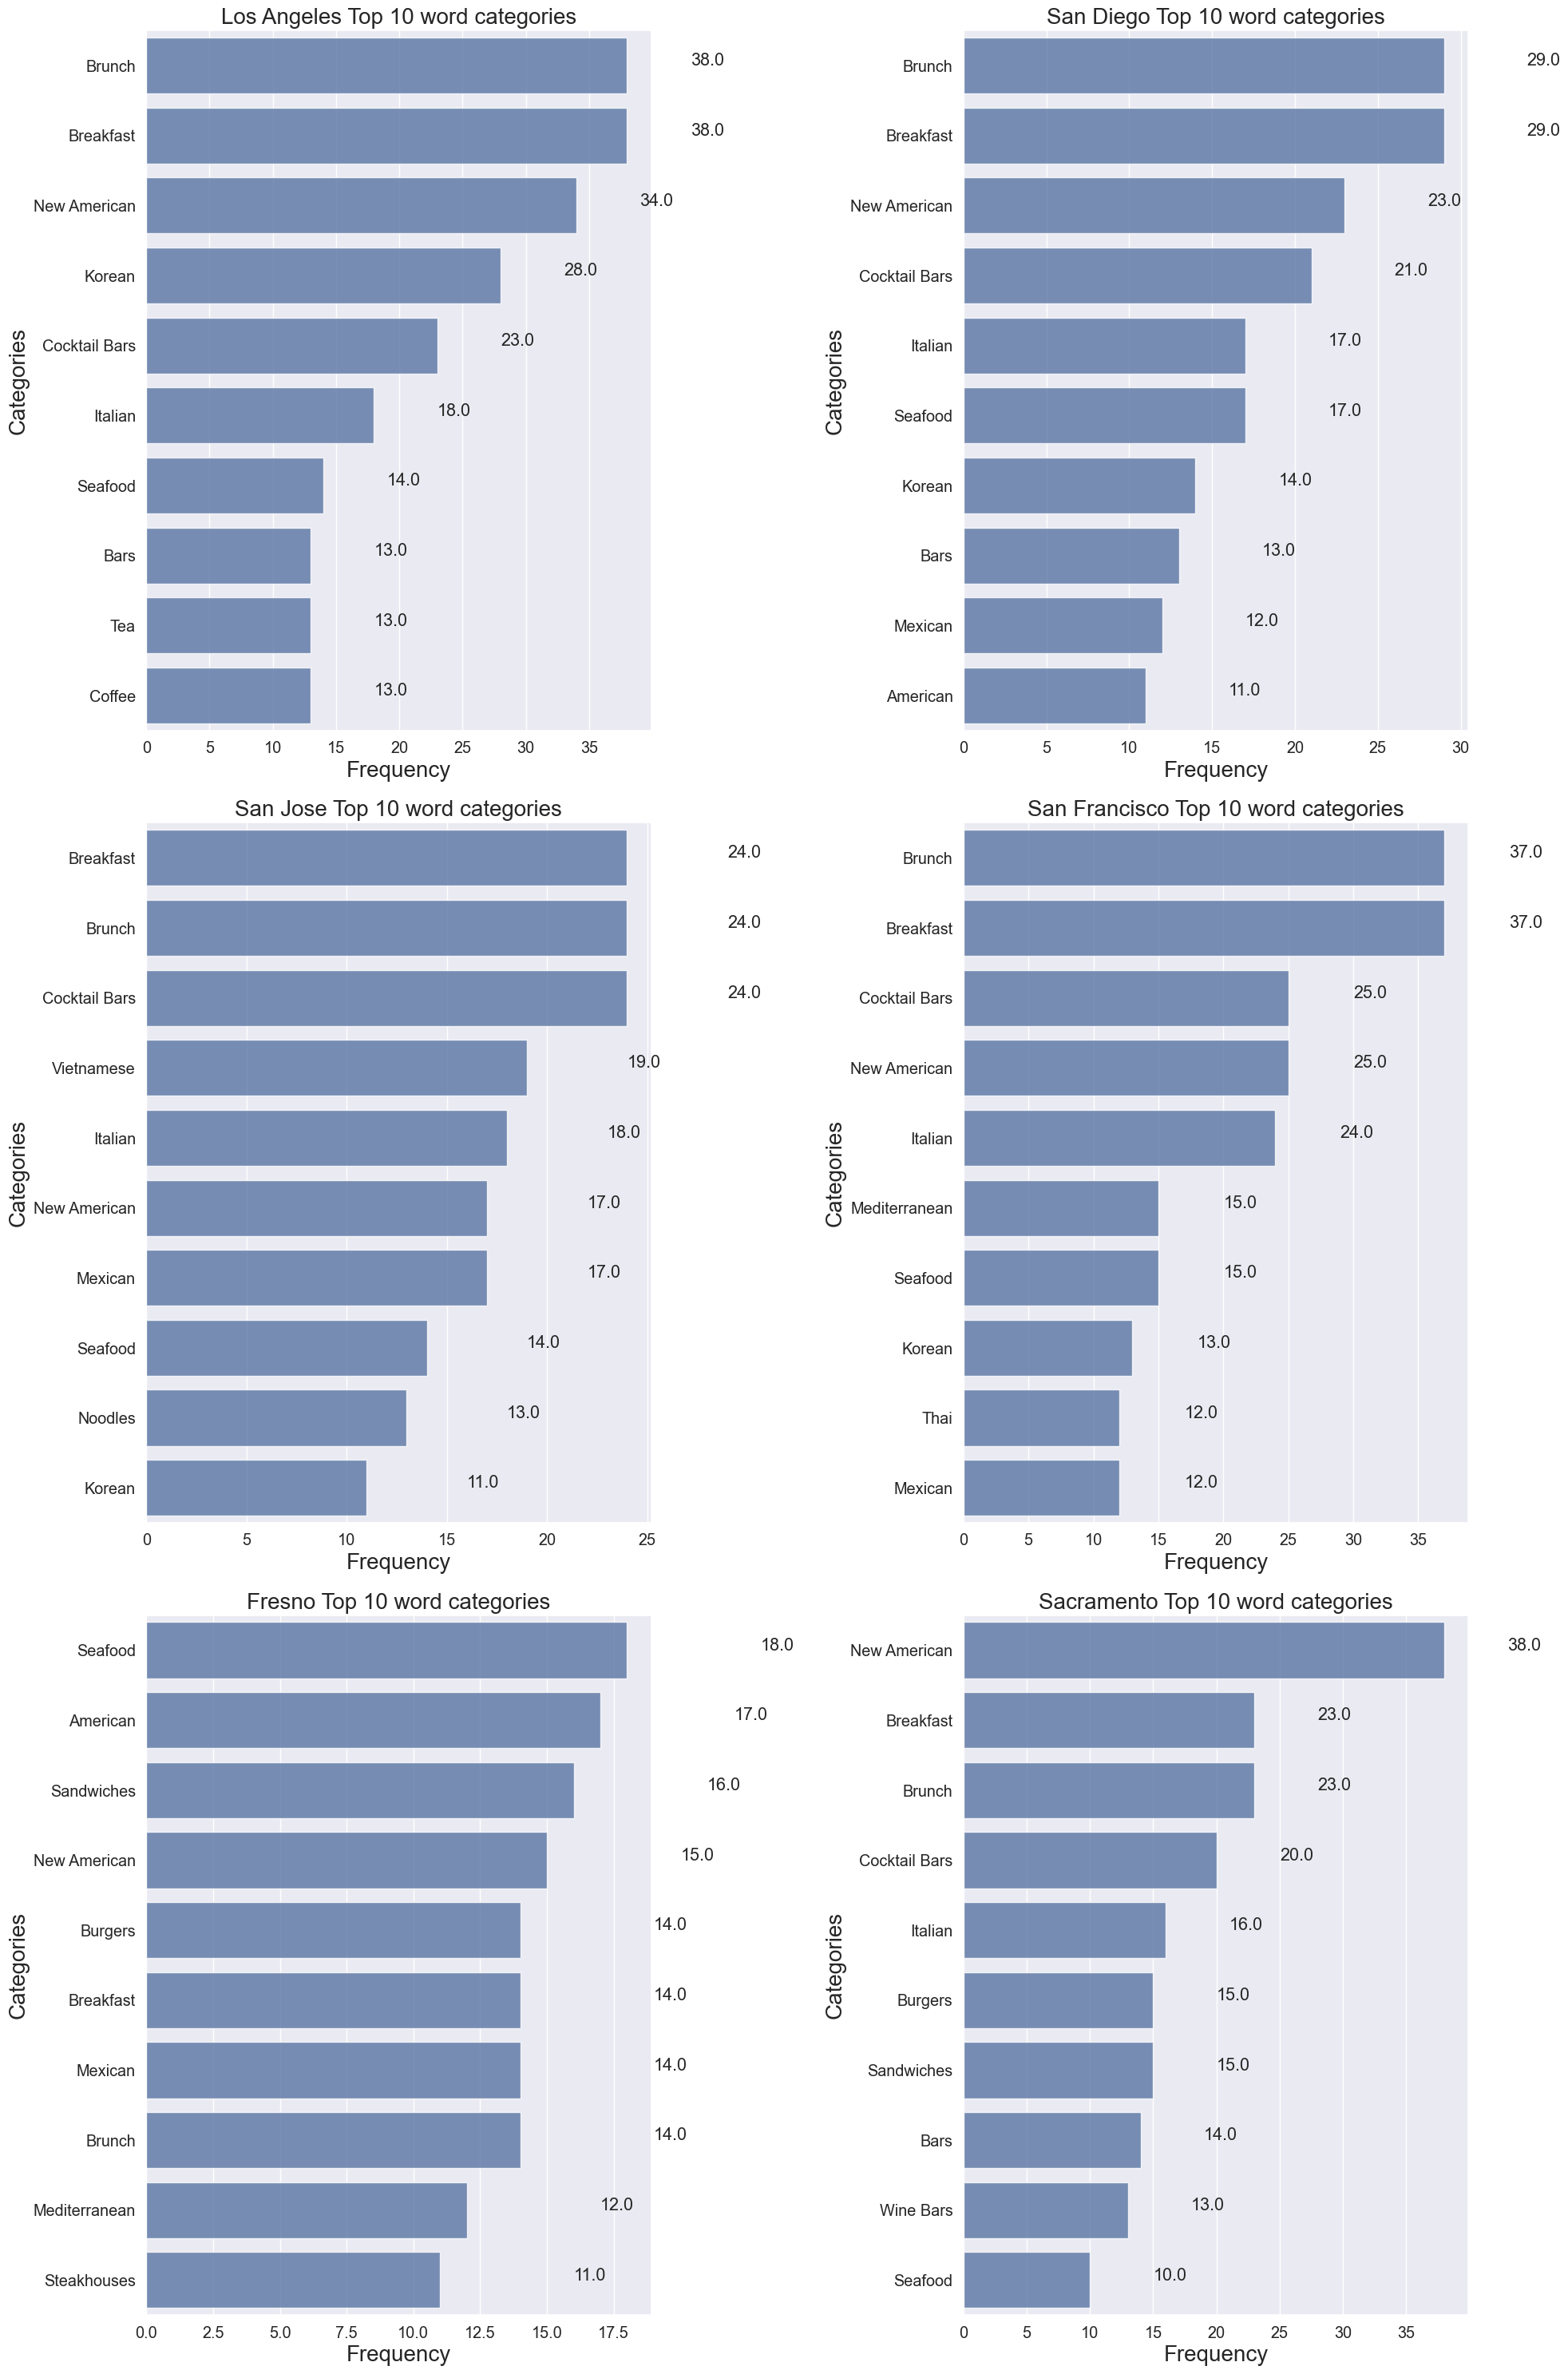

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)

obj = Distribution_plot(LA_data)
LA_data_clean=obj.clean_each_city_df()

obj = Distribution_plot(San_Diego_data)
San_Diego_data_clean=obj.clean_each_city_df()

obj = Distribution_plot(San_Jose_data)
San_Jose_data_clean=obj.clean_each_city_df()

obj = Distribution_plot(San_Fransisco_data)
San_Fransisco_data_clean=obj.clean_each_city_df()

obj = Distribution_plot(Fresno_data)
Fresno_data_clean=obj.clean_each_city_df()

obj = Distribution_plot(Sacramento_data)
Sacramento_data_clean=obj.clean_each_city_df()

cities_data = {
    "Los Angeles": LA_data_clean,
    "San Diego": San_Diego_data_clean,
    "San Jose": San_Jose_data_clean,
    "San Francisco": San_Fransisco_data_clean,
    "Fresno": Fresno_data_clean,
    "Sacramento": Sacramento_data_clean,
}
plt.figure(figsize=(20, 30)) 
for index, (city_name, city_data) in enumerate(cities_data.items(), start=1):
    plt.subplot(3, 2, index)
    Frequecy_of_categoriester = CategoryFrequencyPlotter(city_data)
    Frequecy_of_categoriester.count_categories()
    Frequecy_of_categoriester.plot_category_frequencies(10, 20, f"{city_name} Top 10 word categories")
plt.tight_layout()
plt.show()


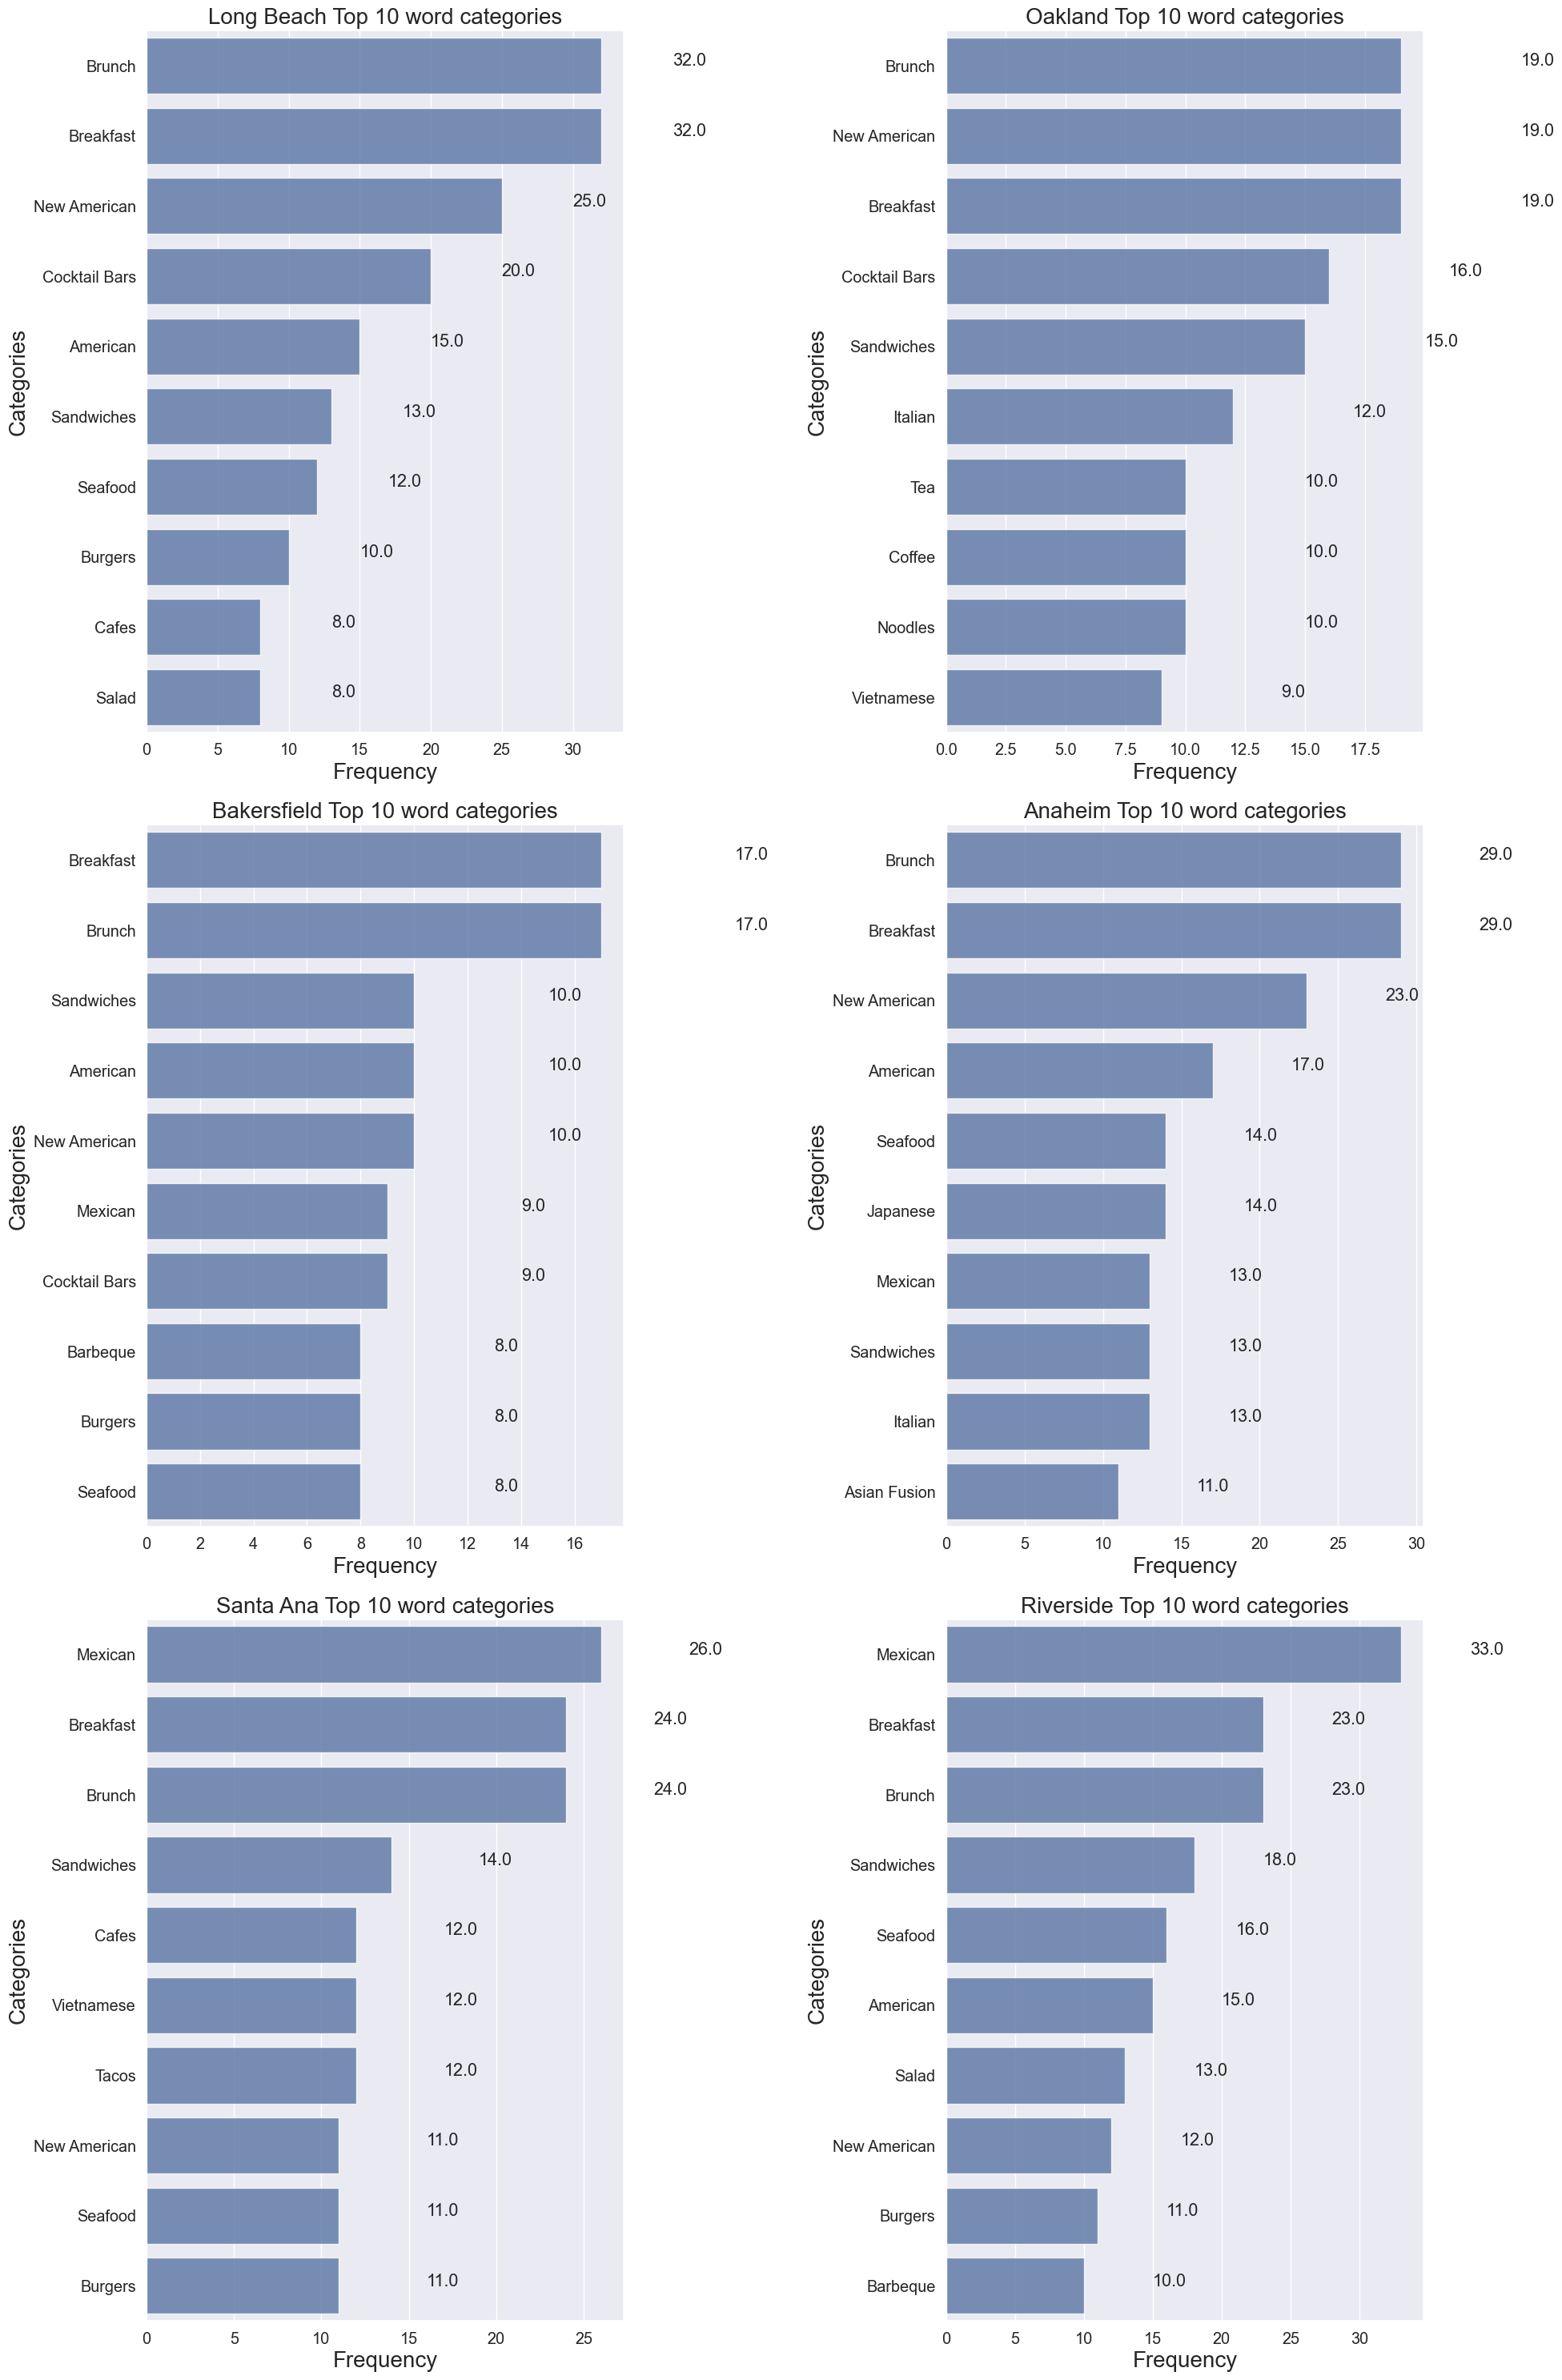

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)

obj = Distribution_plot(Long_Beach_data)
Long_Beach_data_clean=obj.clean_each_city_df()

obj = Distribution_plot(Oakland_data)
Oakland_data_clean=obj.clean_each_city_df()

obj = Distribution_plot(Bakersfield_data)
Bakersfield_data_clean=obj.clean_each_city_df()

obj = Distribution_plot(Anaheim_data)
Anaheim_data_clean=obj.clean_each_city_df()

obj = Distribution_plot(Santa_Ana_data)
Santa_Ana_data_clean=obj.clean_each_city_df()

obj = Distribution_plot(Riverside_data)
Riverside_data_clean=obj.clean_each_city_df()

cities_data = {
    "Long Beach": Long_Beach_data_clean,
    "Oakland": Oakland_data_clean,
    "Bakersfield": Bakersfield_data_clean,
    "Anaheim": Anaheim_data_clean,
    "Santa Ana": Santa_Ana_data_clean,
    "Riverside": Riverside_data_clean,
}
plt.figure(figsize=(20, 30)) 
for index, (city_name, city_data) in enumerate(cities_data.items(), start=1):
    plt.subplot(3, 2, index)
    Frequecy_of_categoriester = CategoryFrequencyPlotter(city_data)
    Frequecy_of_categoriester.count_categories()
    Frequecy_of_categoriester.plot_category_frequencies(10, 20, f"{city_name} Top 10 word categories")
plt.tight_layout() 
plt.show()

The thing we noted from analysing all the restaurant's catogory words in each particular city, we observed that breakfast and brunch places are the most frequent restaurant types in maximum of them. On top of that, These two are on top especially in the Bay Area, maybe it is because of hectic schedule people, and they might prefer having a breakfast outside of the house for ease. For instance, Brunch and Breakfast are the highest category in San Jose, San Diego, etc. whereas it is not the case in cities like Fresno.

### Ratings wrt to categories

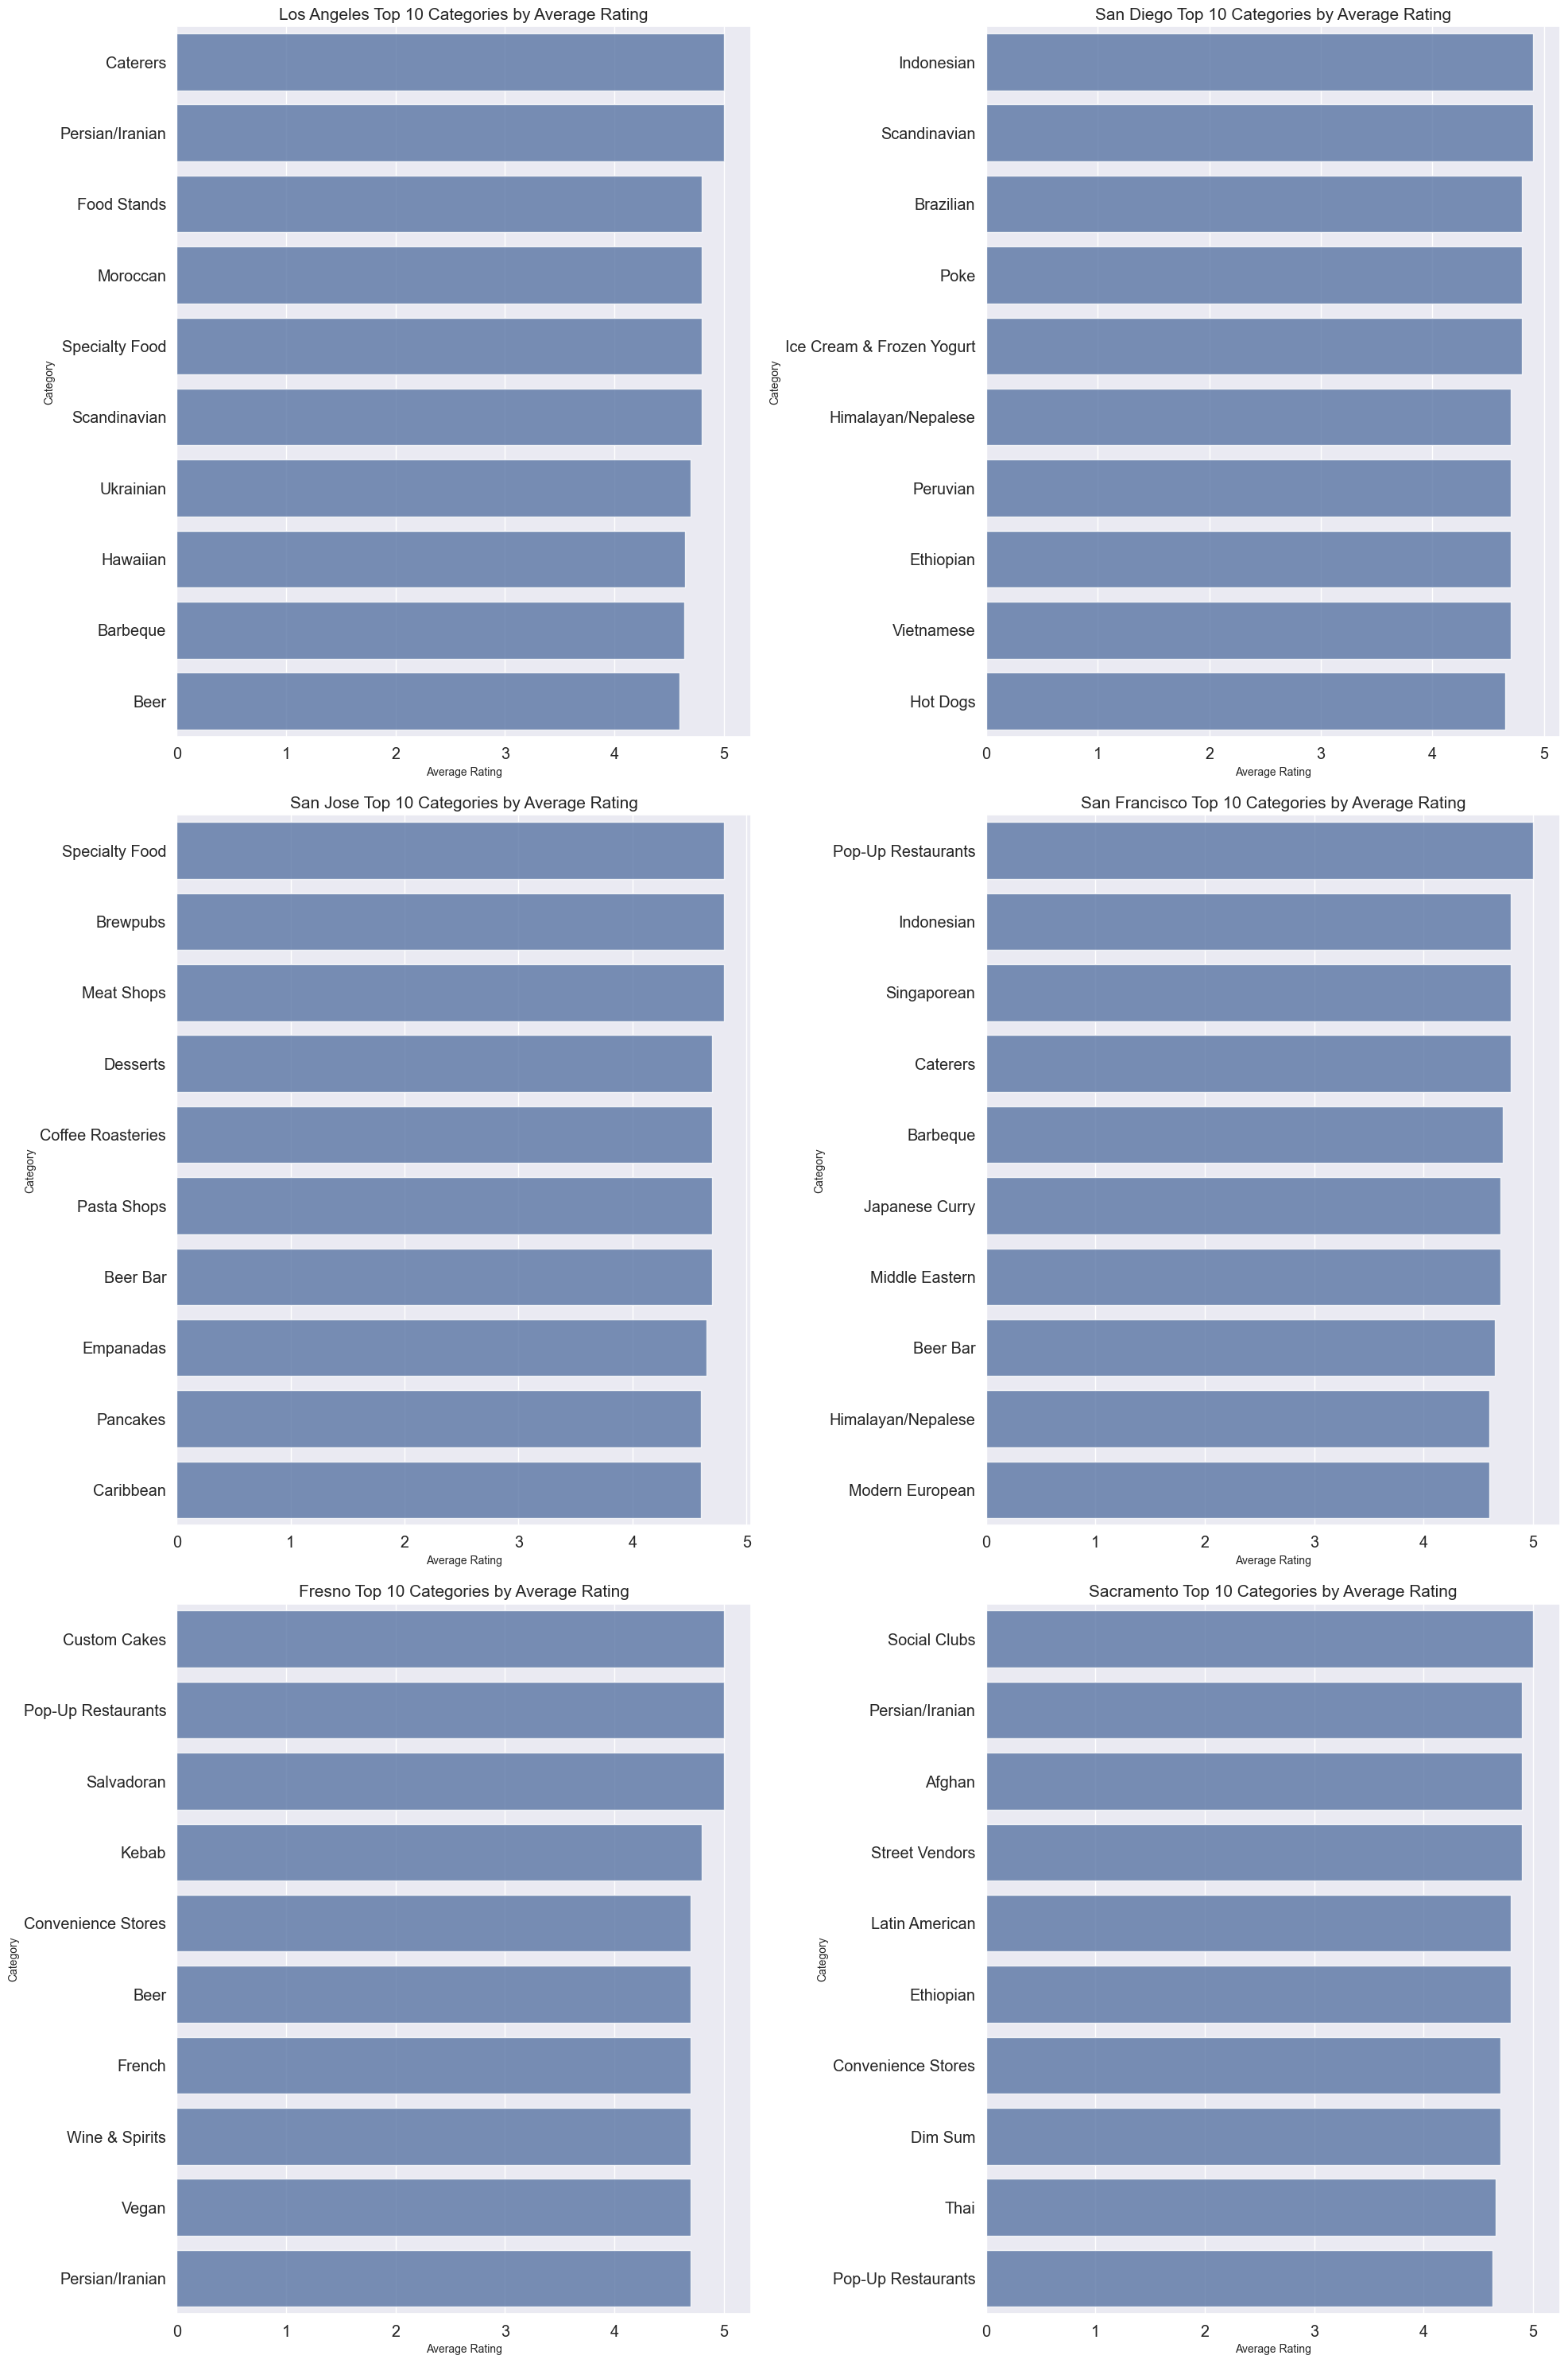

In [43]:
cities_data = {
    "Los Angeles": LA_data_clean,
    "San Diego": San_Diego_data_clean,
    "San Jose": San_Jose_data_clean,
    "San Francisco": San_Fransisco_data_clean,
    "Fresno": Fresno_data_clean,
    "Sacramento": Sacramento_data_clean,
}

plt.figure(figsize=(20, 30))
for index, (city_name, city_data) in enumerate(cities_data.items(), start=1):
    plt.subplot(3, 2, index)
    frequency_of_categories_plotter = CategoryFrequencyPlotter(city_data)
    frequency_of_categories_plotter.plot_average_ratings(top_n=10, title_font_size=15, chart_title=f"{city_name} Top 10 Categories by Average Rating")

plt.tight_layout()
plt.show()

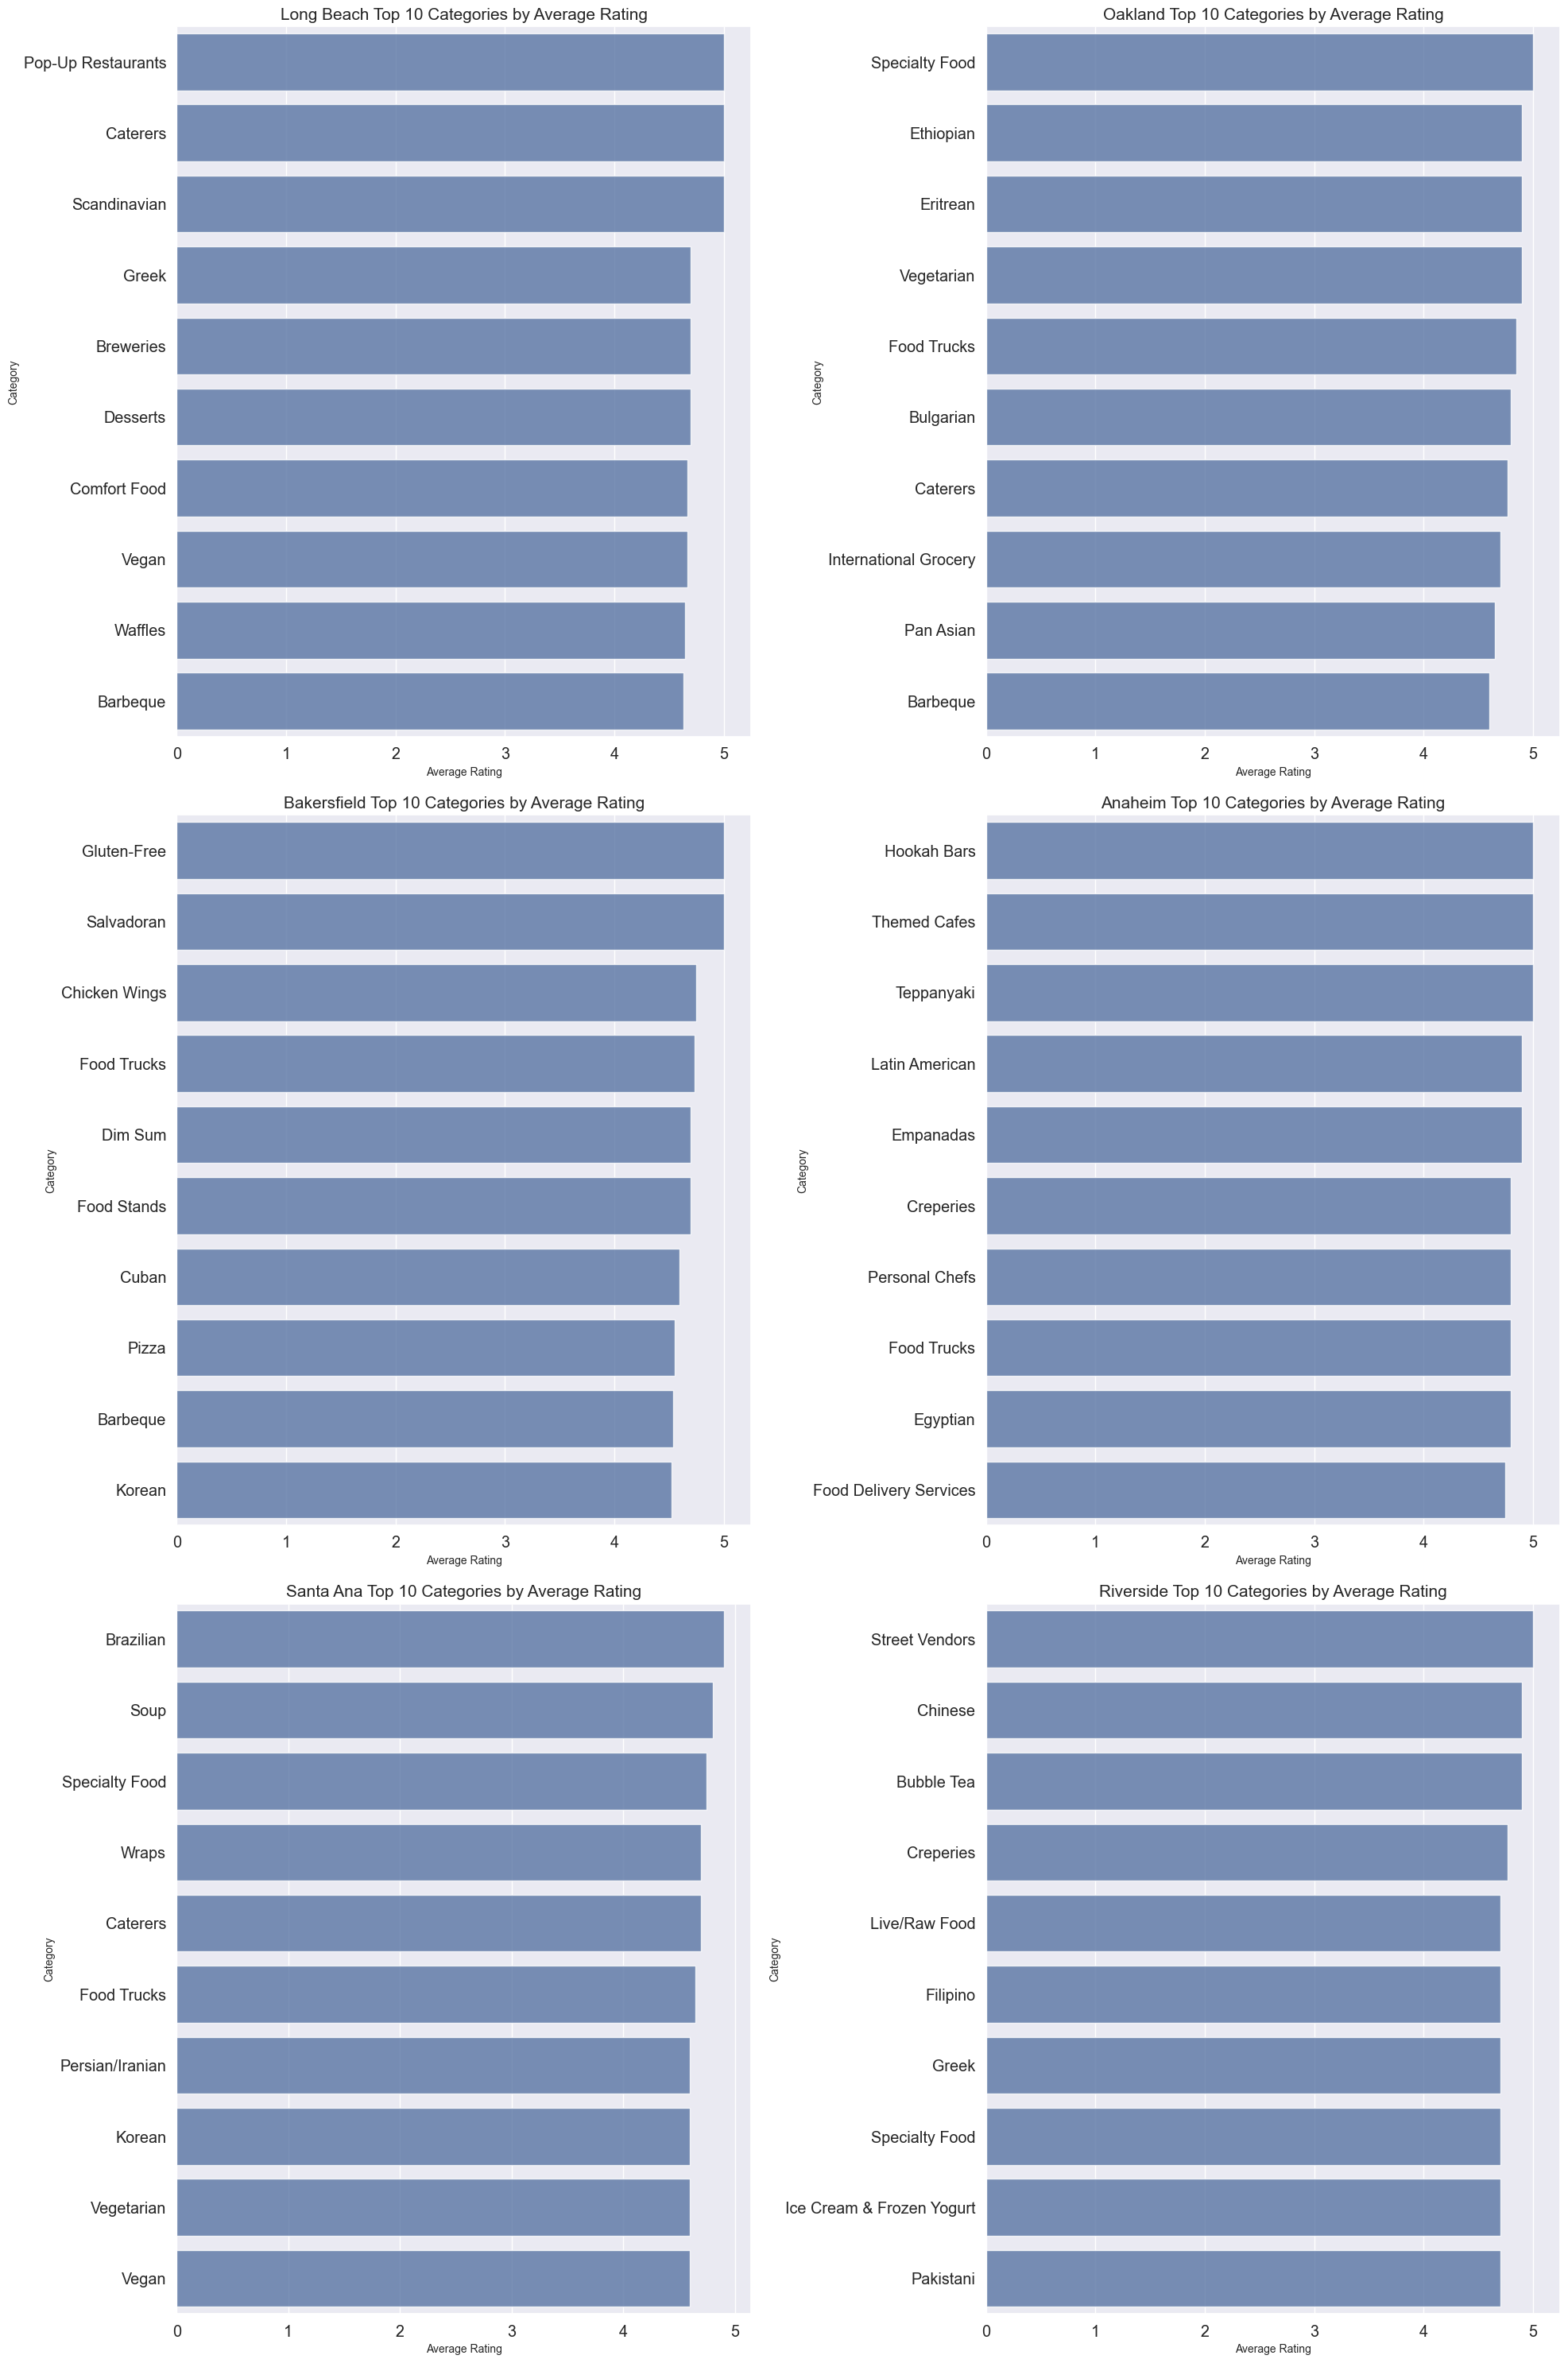

In [44]:
cities_data = {
    "Long Beach": Long_Beach_data_clean,
    "Oakland": Oakland_data_clean,
    "Bakersfield": Bakersfield_data_clean,
    "Anaheim": Anaheim_data_clean,
    "Santa Ana": Santa_Ana_data_clean,
    "Riverside": Riverside_data_clean,
}

plt.figure(figsize=(20, 30))
for index, (city_name, city_data) in enumerate(cities_data.items(), start=1):
    plt.subplot(3, 2, index)
    frequency_of_categories_plotter = CategoryFrequencyPlotter(city_data)
    frequency_of_categories_plotter.plot_average_ratings(top_n=10, title_font_size=15, chart_title=f"{city_name} Top 10 Categories by Average Rating")

plt.tight_layout()
plt.show()

### Top 10 categories wrt to number of reviews

In [73]:
LA_data_clean['Rating'] = LA_data_clean['Rating'].apply(extract_ratings)
San_Diego_data_clean['Rating'] = San_Diego_data_clean['Rating'].apply(extract_ratings)
San_Jose_data_clean['Rating'] = San_Jose_data_clean['Rating'].apply(extract_ratings)
San_Fransisco_data_clean['Rating'] = San_Fransisco_data_clean['Rating'].apply(extract_ratings)
Fresno_data_clean['Rating'] = Fresno_data_clean['Rating'].apply(extract_ratings)
Sacramento_data_clean['Rating'] = Sacramento_data_clean['Rating'].apply(extract_ratings)
Anaheim_data_clean['Rating'] = Anaheim_data_clean['Rating'].apply(extract_ratings)
Long_Beach_data_clean['Rating'] = Long_Beach_data_clean['Rating'].apply(extract_ratings)
Oakland_data_clean['Rating'] = Oakland_data_clean['Rating'].apply(extract_ratings)
Bakersfield_data_clean['Rating'] = Bakersfield_data_clean['Rating'].apply(extract_ratings)
Santa_Ana_data_clean['Rating'] = Santa_Ana_data_clean['Rating'].apply(extract_ratings)
Riverside_data_clean['Rating'] = Riverside_data_clean['Rating'].apply(extract_ratings)

TypeError: expected string or bytes-like object, got 'int'

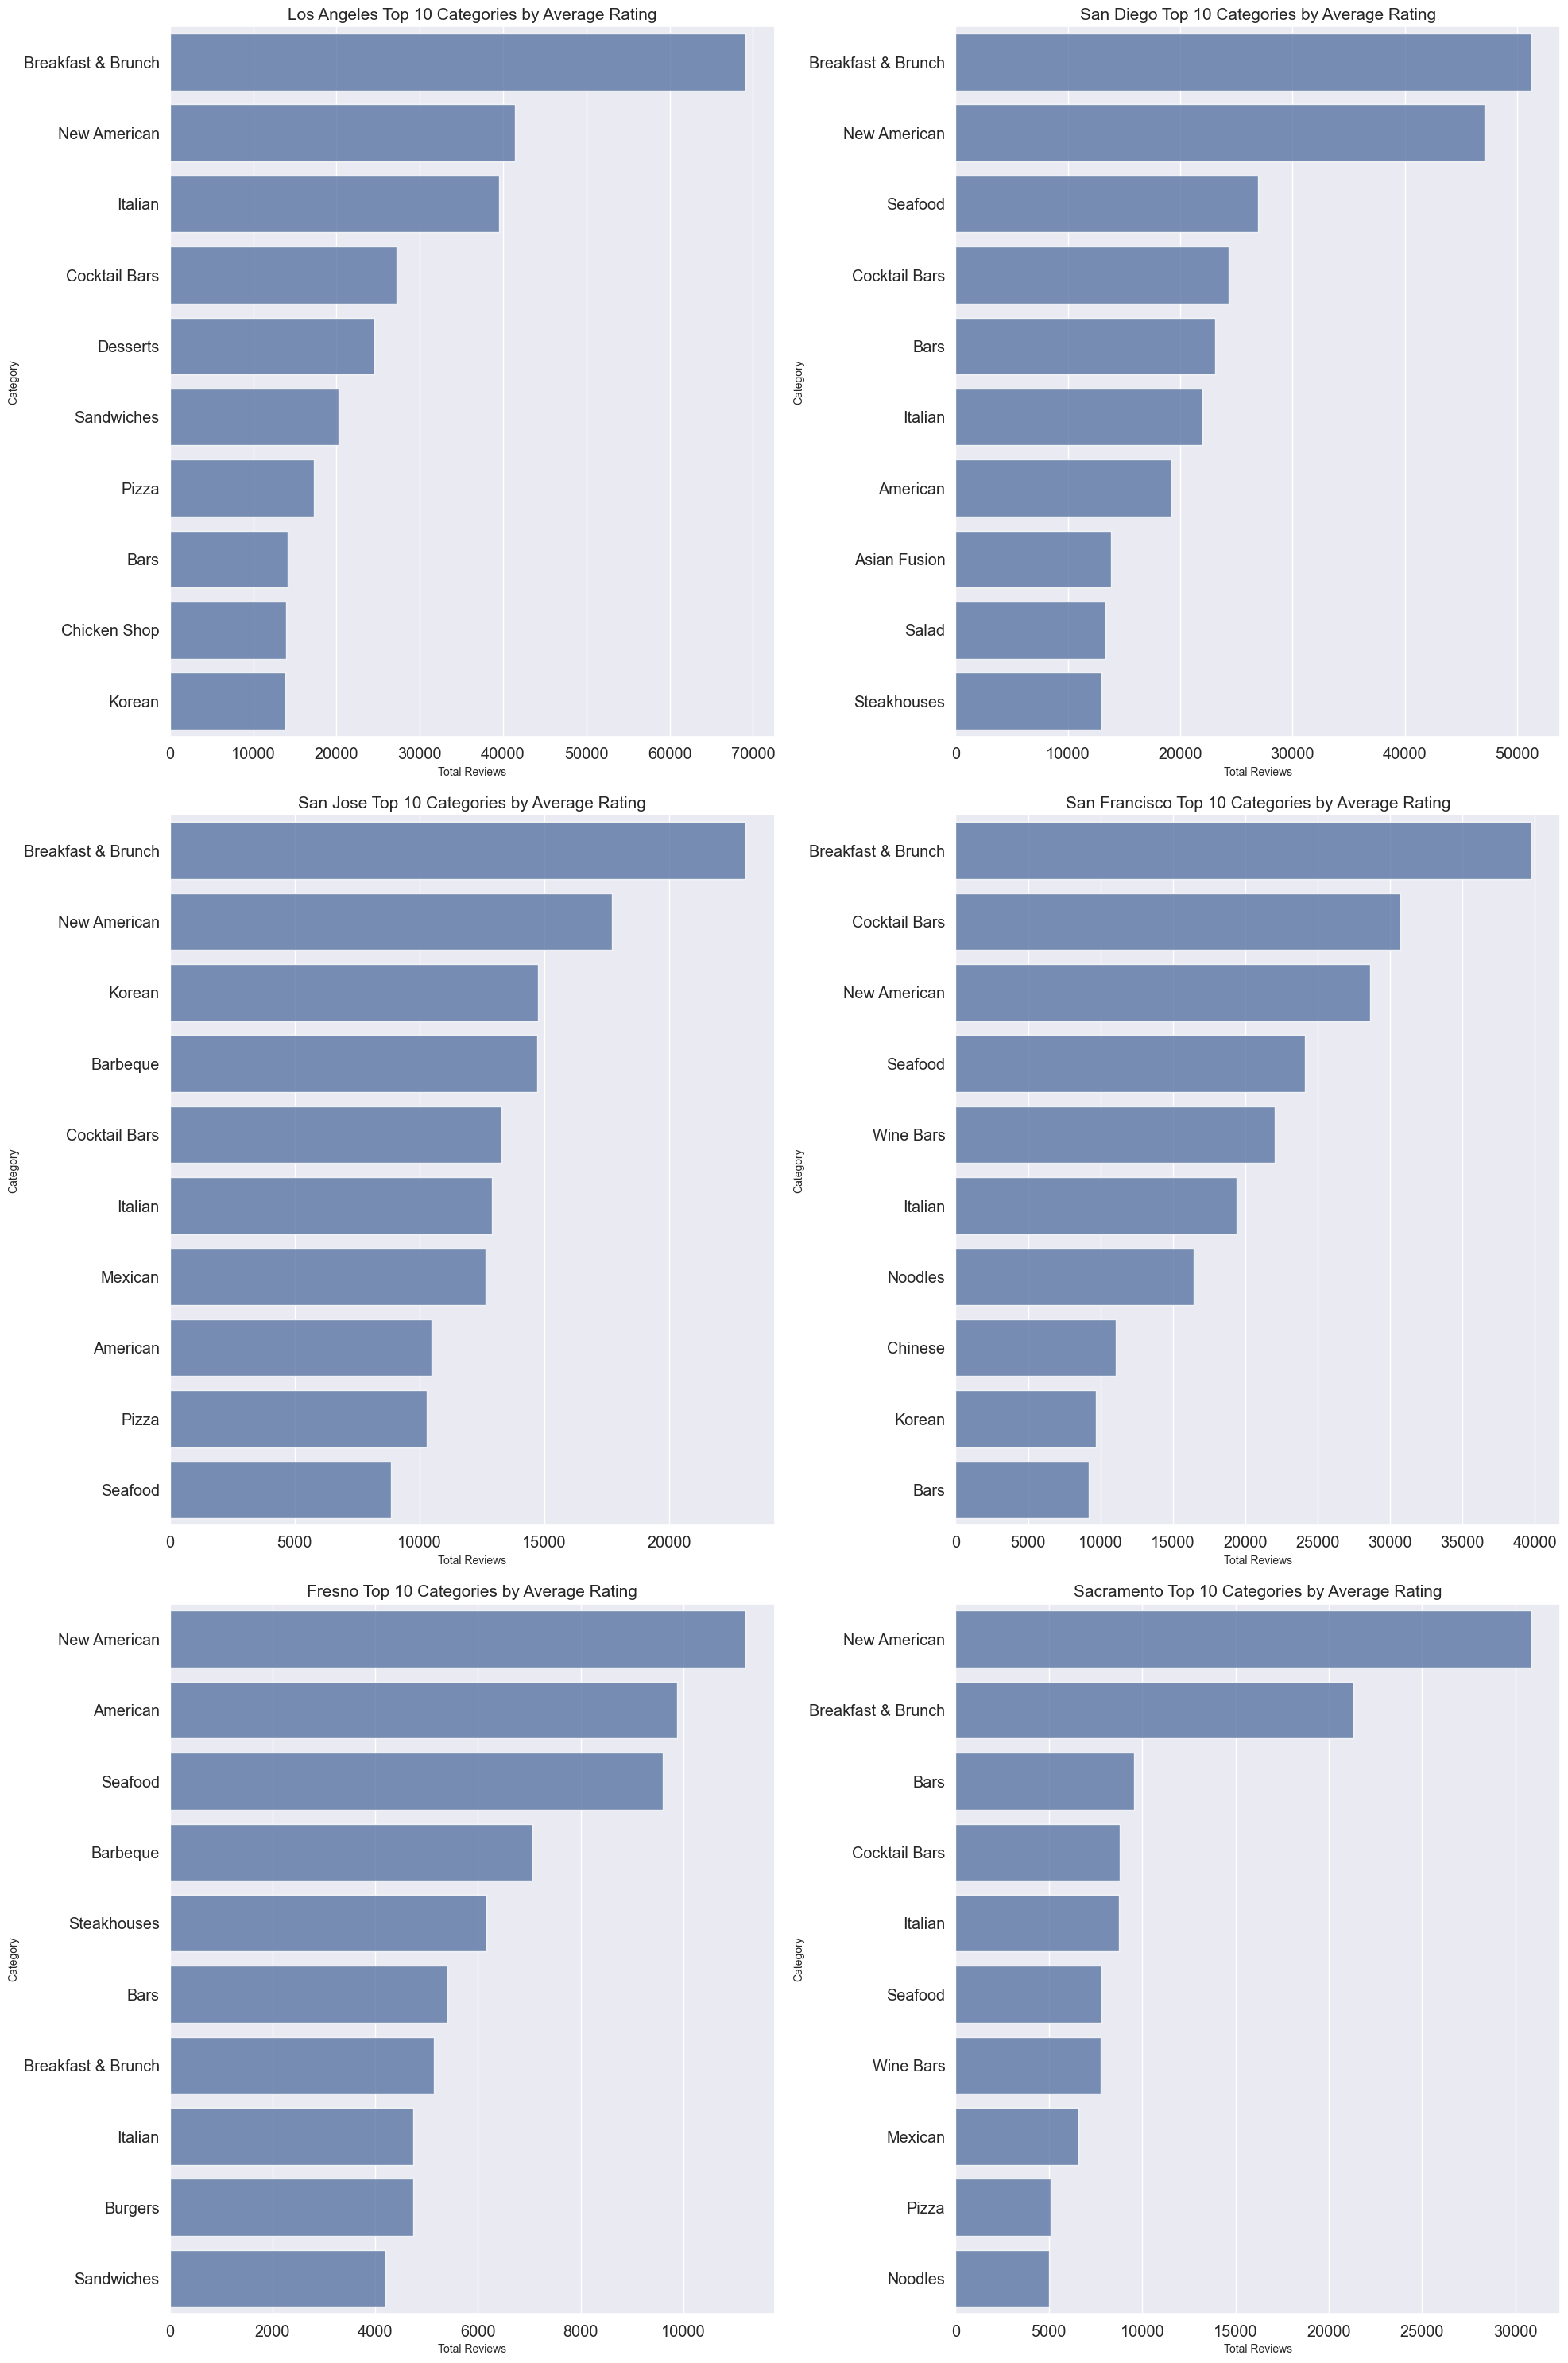

In [74]:
cities_data = {
    "Los Angeles": LA_data_clean,
    "San Diego": San_Diego_data_clean,
    "San Jose": San_Jose_data_clean,
    "San Francisco": San_Fransisco_data_clean,
    "Fresno": Fresno_data_clean,
    "Sacramento": Sacramento_data_clean,
}

plt.figure(figsize=(20, 30))
for index, (city_name, city_data) in enumerate(cities_data.items(), start=1):
    plt.subplot(3, 2, index)
    frequency_of_categories_plotter = CategoryFrequencyPlotter(city_data)
    frequency_of_categories_plotter.plot_total_reviews(top_n=10, title_font_size=15, chart_title=f"{city_name} Top 10 Categories by Average Rating")

plt.tight_layout()
plt.show()

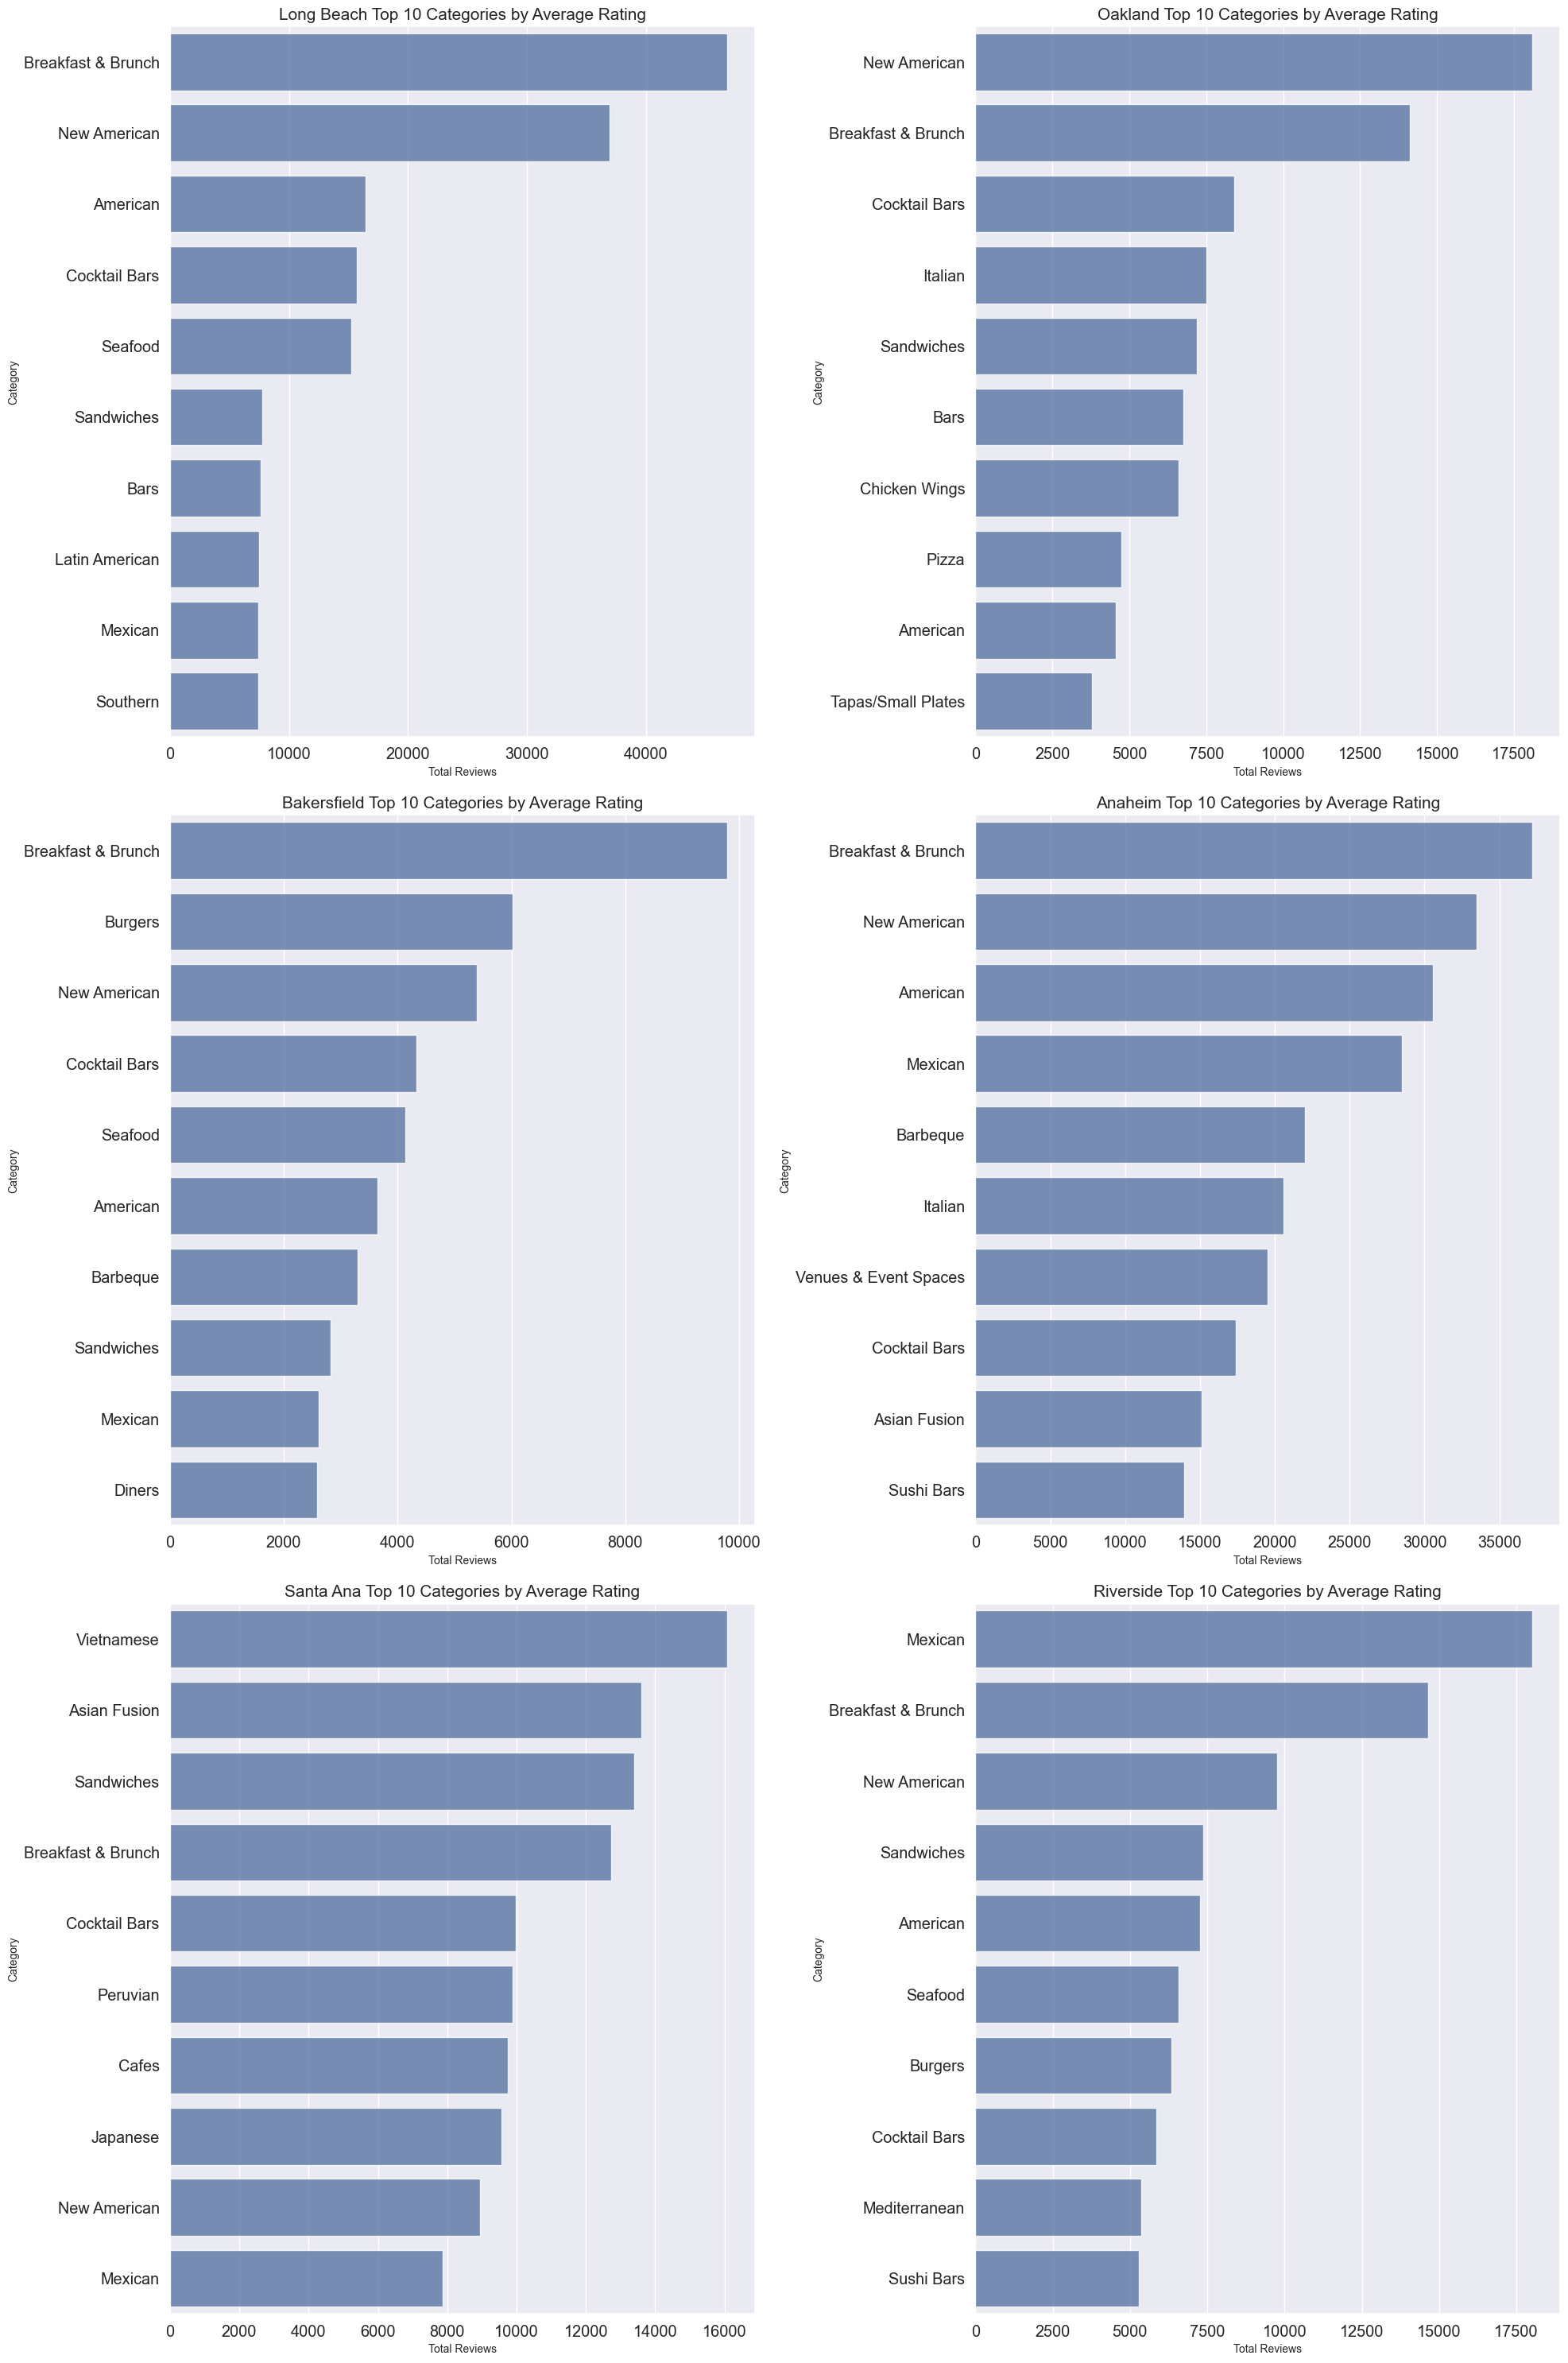

In [75]:
cities_data = {
    "Long Beach": Long_Beach_data_clean,
    "Oakland": Oakland_data_clean,
    "Bakersfield": Bakersfield_data_clean,
    "Anaheim": Anaheim_data_clean,
    "Santa Ana": Santa_Ana_data_clean,
    "Riverside": Riverside_data_clean,
}

plt.figure(figsize=(20, 30))
for index, (city_name, city_data) in enumerate(cities_data.items(), start=1):
    plt.subplot(3, 2, index)
    frequency_of_categories_plotter = CategoryFrequencyPlotter(city_data)
    frequency_of_categories_plotter.plot_total_reviews(top_n=10, title_font_size=15, chart_title=f"{city_name} Top 10 Categories by Average Rating")

plt.tight_layout()
plt.show()

## - Wordcloud

In [45]:
Final_DataFrame_Combined["Category"]

1              Mexican, Cocktail Bars, Breakfast & Brunch
2       New American, Breakfast & Brunch, Beer, Wine &...
3                        Korean, Bars, Tapas/Small Plates
4                 Cafes, Breakfast & Brunch, New American
5         New American, Breakfast & Brunch, Cocktail Bars
                              ...                        
1944                            Diners, Mexican, American
1945                   Breakfast & Brunch, Mexican, Salad
1946                                                 Thai
1947                                           Gastropubs
1948                     Asian Fusion, Caterers, Filipino
Name: Category, Length: 1948, dtype: object

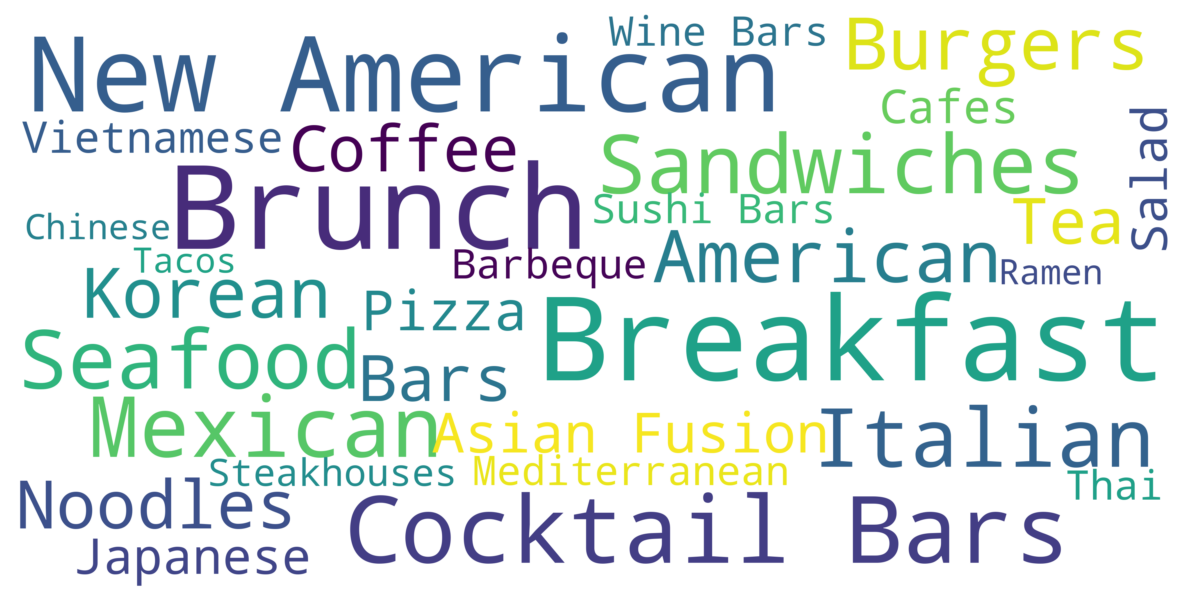

In [46]:
Frequecy_of_categories = CategoryFrequencyPlotter(Final_DataFrame_Combined)
Frequecy_of_categories.count_categories()
Frequecy_of_categories.generate_wordcloud(max_words=30)


### Part III: Restaurants operation hours analysis


In [1]:
def OpeningTime(time_str):
    if time_str == None:
        return None
    if time_str == 'Closed':
         return 'Closed'
    #print("Actual string", time_str)
    components = str(time_str[0][0]).split()
    #print("time_str:",components)
    #print("Opening component:",type(components[0]))
    opening_hour_component = str(components[0]).split(':')
    if len(opening_hour_component) != 2:
        return "Closed"
    opening_hour, opening_minute = map(int, opening_hour_component)
    if 'PM' in components[1] and opening_hour != 12:
        opening_hour += 12
    opening_minute = opening_minute if opening_minute != 0 else '00'
    return str(opening_hour)+":"+str(opening_minute)

time_str = [['3:00 PM - 9:30 PM']]
hour_24_format = OpeningTime(time_str)
print(hour_24_format)


15:00


In [2]:
def ClosingTime(time_str):
    if time_str == None or time_str=="Unknown":
        return 'No Info'
    if time_str == 'Closed':
        return 'Closed'

    try:
        #print("Actual string", time_str)
        components = str(time_str[0][1]).split()
        #print("time_str:",components)
        #print("closing component:",components[0])
    except:
        components = str(time_str).split(" - ")[-1].split()[0:2]
        #print(time_str, "################", components)
  
    closing_hour_component = str(components[0]).split(':')
    if len(closing_hour_component) != 2:
        return "Closed"
    closing_hour, closing_minute = map(int, closing_hour_component)
    if 'PM' in components[1] and closing_hour != 12:
        closing_hour += 12
    closing_minute = closing_minute if closing_minute != 0 else '00'
    return str(closing_hour)+":"+str(closing_minute)

time_str = [['9:00 PM ','10:30 PM']]
time_str = [['7:00 AM ','11:00 AM']]
closing_hour_24 = ClosingTime(time_str)
print(closing_hour_24) 

11:00


In [49]:
Final_DataFrame_Combined[['MonOpen', 'TueOpen', 'WedOpen', 'ThuOpen', 'FriOpen', 'SatOpen', 
               'SunOpen']] = Final_DataFrame_Combined[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 
                                            'Sat', 'Sun']].applymap(OpeningTime)

Final_DataFrame_Combined[['MonClose', 'TueClose', 'WedClose', 'ThuClose', 'FriClose', 'SatClose', 
               'SunClose']] = Final_DataFrame_Combined[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 
                                            'Sat', 'Sun']].applymap(ClosingTime)
Final_DataFrame_Combined.head()

Actual string 7:00 AM - 11:00 AM
time_str: ['7']
Opening component: <class 'str'>
Actual string 5:00 PM - 2:00 AM (Next day)
time_str: ['5']
Opening component: <class 'str'>
Actual string 8:00 AM - 3:00 PM
time_str: ['8']
Opening component: <class 'str'>
Actual string 8:00 AM - 10:00 PM
time_str: ['8']
Opening component: <class 'str'>
Actual string 8:00 AM - 2:00 PM
time_str: ['8']
Opening component: <class 'str'>
Actual string 11:00 AM - 11:00 PM
time_str: ['1']
Opening component: <class 'str'>
Actual string 11:30 AM - 10:00 PM
time_str: ['1']
Opening component: <class 'str'>
Actual string 4:00 PM - 12:00 AM (Next day)
time_str: ['4']
Opening component: <class 'str'>
Actual string 11:00 AM - 10:00 PM
time_str: ['1']
Opening component: <class 'str'>
Actual string 11:00 AM - 9:30 PM
time_str: ['1']
Opening component: <class 'str'>
Actual string 11:00 AM - 3:00 PM
time_str: ['1']
Opening component: <class 'str'>
Actual string 3:00 PM - 12:00 AM (Next day)
time_str: ['3']
Opening componen

index              Name                                      Address  \
1     1           Ka'teen         6516 Selma Ave Los Angeles, CA 90028   
2     2    The Front Yard  4222 Vineland Ave North Hollywood, CA 91602   
3     3        Anju House       234 S Oxford Ave Los Angeles, CA 90004   
4     4  Met Her At A Bar      759 S La Brea Ave Los Angeles, CA 90036   
5     5       Great White   244 N Larchmont Blvd Los Angeles, CA 90004   

                                            Category    Price  \
1         Mexican, Cocktail Bars, Breakfast & Brunch  Unknown   
2  New American, Breakfast & Brunch, Beer, Wine &...       $$   
3                   Korean, Bars, Tapas/Small Plates  Unknown   
4            Cafes, Breakfast & Brunch, New American       $$   
5    New American, Breakfast & Brunch, Cocktail Bars       $$   

            Rating Reviews                           Mon  \
1    (678 reviews)     4.0                        Closed   
2  (3,513 reviews)     4.0            7:00 AM - 11:00 AM   
3    (183 reviews)     4.3  5:00 PM - 2:00 AM (Next day)   
4  (2,581 reviews)     4.4             8:00 AM - 3:00 PM   
5    (552 reviews)     4.1            8:00 AM - 10:00 PM   

                            Tue                           Wed  ... SatOpen  \
1             6:00 PM - 9:00 PM             6:00 PM - 9:00 PM  ...  Closed   
2            7:00 AM - 11:00 AM            7:00 AM - 11:00 AM  ...  Closed   
3  5:00 PM - 2:00 AM (Next day)  5:00 PM - 2:00 AM (Next day)  ...  Closed   
4             8:00 AM - 3:00 PM             8:00 AM - 3:00 PM  ...  Closed   
5            8:00 AM - 10:00 PM            8:00 AM - 10:00 PM  ...  Closed   

  SunOpen MonClose TueClose WedClose ThuClose FriClose SatClose SunClose  \
1  Closed   Closed    21:00    21:00    21:00    23:00    23:00    14:30   
2  Closed    11:00    11:00    11:00    11:00    11:00    22:30    22:30   
3  Closed     2:00     2:00     2:00     2:00     2:00     2:00    12:00   
4  Closed    15:00    15:00    15:00    15:00    15:00    16:00    16:00   
5  Closed    22:00    22:00    22:00    22:00    22:00    22:00    22:00   

         ZIP  
1   CA 90028  
2   CA 91602  
3   CA 90004  
4   CA 90036  
5   CA 90004  

[5 rows x 29 columns]

### Part IV: Top 25 restaurants reviews distribution analysis based on cities 

In [50]:
Final_DataFrame_Combined['Reviews'] = pd.to_numeric(Final_DataFrame_Combined['Reviews'], errors='coerce').fillna(0)
Final_DataFrame_Combined.loc[Final_DataFrame_Combined['Reviews'] == 'Unknown', 'Reviews'] = 0
Final_DataFrame_Combined['Reviews'] = Final_DataFrame_Combined['Reviews'].astype(float)
Final_DataFrame_Combined.head()

index              Name                                      Address  \
1     1           Ka'teen         6516 Selma Ave Los Angeles, CA 90028   
2     2    The Front Yard  4222 Vineland Ave North Hollywood, CA 91602   
3     3        Anju House       234 S Oxford Ave Los Angeles, CA 90004   
4     4  Met Her At A Bar      759 S La Brea Ave Los Angeles, CA 90036   
5     5       Great White   244 N Larchmont Blvd Los Angeles, CA 90004   

                                            Category    Price  \
1         Mexican, Cocktail Bars, Breakfast & Brunch  Unknown   
2  New American, Breakfast & Brunch, Beer, Wine &...       $$   
3                   Korean, Bars, Tapas/Small Plates  Unknown   
4            Cafes, Breakfast & Brunch, New American       $$   
5    New American, Breakfast & Brunch, Cocktail Bars       $$   

            Rating  Reviews                           Mon  \
1    (678 reviews)      4.0                        Closed   
2  (3,513 reviews)      4.0            7:00 AM - 11:00 AM   
3    (183 reviews)      4.3  5:00 PM - 2:00 AM (Next day)   
4  (2,581 reviews)      4.4             8:00 AM - 3:00 PM   
5    (552 reviews)      4.1            8:00 AM - 10:00 PM   

                            Tue                           Wed  ... SatOpen  \
1             6:00 PM - 9:00 PM             6:00 PM - 9:00 PM  ...  Closed   
2            7:00 AM - 11:00 AM            7:00 AM - 11:00 AM  ...  Closed   
3  5:00 PM - 2:00 AM (Next day)  5:00 PM - 2:00 AM (Next day)  ...  Closed   
4             8:00 AM - 3:00 PM             8:00 AM - 3:00 PM  ...  Closed   
5            8:00 AM - 10:00 PM            8:00 AM - 10:00 PM  ...  Closed   

  SunOpen MonClose TueClose WedClose ThuClose FriClose SatClose SunClose  \
1  Closed   Closed    21:00    21:00    21:00    23:00    23:00    14:30   
2  Closed    11:00    11:00    11:00    11:00    11:00    22:30    22:30   
3  Closed     2:00     2:00     2:00     2:00     2:00     2:00    12:00   
4  Closed    15:00    15:00    15:00    15:00    15:00    16:00    16:00   
5  Closed    22:00    22:00    22:00    22:00    22:00    22:00    22:00   

         ZIP  
1   CA 90028  
2   CA 91602  
3   CA 90004  
4   CA 90036  
5   CA 90004  

[5 rows x 29 columns]

In [52]:
Freq_rev_df = Final_DataFrame_Combined.sort_values('Rating', ascending=False)
v = Freq_rev_df['Name'].values.tolist()[0:25]
d = Freq_rev_df['Rating'].values.tolist()[0:25]
color_series = ['#FAE927','#E9E416','#C9DA36','#9ECB3C','#6DBC49',
                '#37B44E','#3DBA78','#14ADCF','#209AC9','#1E91CA',
                '#2C6BA0','#2B55A1','#2D3D8E','#44388E','#7D3990',
                '#A63F98','#C31C88','#D52178','#D5225B','#D02C2A',
                '#D44C2D','#F57A34','#FA8F2F','#D99D21','#CF7B25']

In [53]:
Freq_rev_df.head()

index                             Name  \
53      60                    Bottega Louie   
738    790            Fog Harbor Fish House   
1496  1578  Craft By Smoke & Fire - Anaheim   
199    216           Snooze, an A.M. Eatery   
237    256               Hash House A Go Go   

                                          Address  \
53          700 S Grand Ave Los Angeles, CA 90017   
738      39 Pier Ste 202A San Francisco, CA 94133   
1496  195 W Center St Promenade Anaheim, CA 92805   
199            3940 Fifth Ave San Diego, CA 92103   
237              3628 5th Ave San Diego, CA 92103   

                                         Category Price  Rating  Reviews  \
53          Italian, Desserts, Breakfast & Brunch    $$   18747      4.1   
738             Seafood, Wine Bars, Cocktail Bars    $$   10234      4.3   
1496            Barbeque, Cocktail Bars, American    $$    9675      4.7   
199   Breakfast & Brunch, American, Cocktail Bars    $$    8514      4.4   
237       Breakfast & Brunch, New American, Salad    $$    8511      4.1   

                      Mon                  Tue                  Wed  ...  \
53     8:00 AM - 11:00 PM   8:00 AM - 11:00 PM   8:00 AM - 11:00 PM  ...   
738    11:00 AM - 9:00 PM   11:00 AM - 9:00 PM   11:00 AM - 9:00 PM  ...   
1496  11:00 AM - 10:00 PM  11:00 AM - 10:00 PM  11:00 AM - 10:00 PM  ...   
199     6:30 AM - 2:30 PM    6:30 AM - 2:30 PM    6:30 AM - 2:30 PM  ...   
237     7:30 AM - 2:00 PM    7:30 AM - 2:00 PM    7:30 AM - 2:00 PM  ...   

     SatOpen SunOpen MonClose TueClose WedClose ThuClose FriClose SatClose  \
53    Closed  Closed    23:00    23:00    23:00    23:00    12:00    12:00   
738   Closed  Closed    21:00    21:00    21:00    21:00    21:00    21:00   
1496  Closed  Closed    22:00    22:00    22:00    22:00    12:00    12:00   
199   Closed  Closed    14:30    14:30    14:30    14:30    14:30    16:00   
237   Closed  Closed    14:00    14:00    14:00    14:00    14:00    15:00   

     SunClose        ZIP  
53      23:00   CA 90017  
738     21:00   CA 94133  
1496    22:00   CA 92805  
199     16:00   CA 92103  
237     15:00   CA 92103  

[5 rows x 29 columns]

In [54]:
pie1 = Pie(init_opts=opts.InitOpts(width='1000px', height='800px'))
pie1.set_colors(color_series)
pie1.add("", [list(z) for z in zip(v, d)],
        radius=["30%", "135%"],
        center=["50%", "65%"],
        rosetype="area")
pie1.set_global_opts(title_opts=opts.TitleOpts(title='Top 25 most popular restaurants with most reviews'),
                     legend_opts=opts.LegendOpts(is_show=False),
                     toolbox_opts=opts.ToolboxOpts())
pie1.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="inside", font_size=12,
                                               formatter="{b}:{c}", font_style="italic",
                                               font_weight="bold"))
pie1.render_notebook()

**Observations and Comments:**

- The plot above showed top 25 most reviewed restaurants by this Archimedean spiral-liked plot.

We would like perfrom some further analysis combined graphical methods on these top 25 restaurants, and we before with a list of these ideal restaurants:

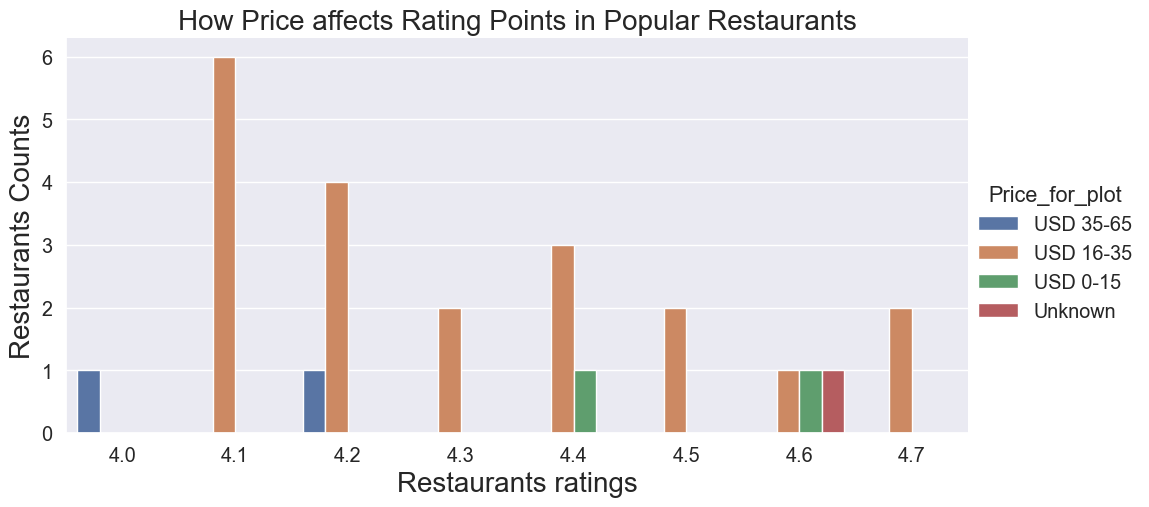

In [57]:
Freq_rev_df['Price_for_plot'] = Freq_rev_df['Price'].replace({'\$\$\$': 'USD 35-65', '\$\$': 'USD 16-35', '\$': 'USD 0-15'}, regex=True)
sns.set(rc={'figure.figsize':(25, 25)})
sns.set(font_scale=1.3)
cat_plot = sns.catplot(x='Reviews', hue='Price_for_plot', kind='count', data=Freq_rev_df[:25], height=5, aspect=2)
plt.ylabel('Restaurants Counts', fontsize=20)
plt.xlabel('Restaurants ratings', fontsize=20)
plt.title('How Price affects Rating Points in Popular Restaurants', fontsize=20)
plt.show()

### Part V: Restaurants geo-spatial analysis 

In [58]:
Final_DataFrame_Combined.head()

index              Name                                      Address  \
1     1           Ka'teen         6516 Selma Ave Los Angeles, CA 90028   
2     2    The Front Yard  4222 Vineland Ave North Hollywood, CA 91602   
3     3        Anju House       234 S Oxford Ave Los Angeles, CA 90004   
4     4  Met Her At A Bar      759 S La Brea Ave Los Angeles, CA 90036   
5     5       Great White   244 N Larchmont Blvd Los Angeles, CA 90004   

                                            Category    Price  Rating  \
1         Mexican, Cocktail Bars, Breakfast & Brunch  Unknown     678   
2  New American, Breakfast & Brunch, Beer, Wine &...       $$    3513   
3                   Korean, Bars, Tapas/Small Plates  Unknown     183   
4            Cafes, Breakfast & Brunch, New American       $$    2581   
5    New American, Breakfast & Brunch, Cocktail Bars       $$     552   

   Reviews                           Mon                           Tue  \
1      4.0                        Closed             6:00 PM - 9:00 PM   
2      4.0            7:00 AM - 11:00 AM            7:00 AM - 11:00 AM   
3      4.3  5:00 PM - 2:00 AM (Next day)  5:00 PM - 2:00 AM (Next day)   
4      4.4             8:00 AM - 3:00 PM             8:00 AM - 3:00 PM   
5      4.1            8:00 AM - 10:00 PM            8:00 AM - 10:00 PM   

                            Wed  ... SatOpen SunOpen MonClose TueClose  \
1             6:00 PM - 9:00 PM  ...  Closed  Closed   Closed    21:00   
2            7:00 AM - 11:00 AM  ...  Closed  Closed    11:00    11:00   
3  5:00 PM - 2:00 AM (Next day)  ...  Closed  Closed     2:00     2:00   
4             8:00 AM - 3:00 PM  ...  Closed  Closed    15:00    15:00   
5            8:00 AM - 10:00 PM  ...  Closed  Closed    22:00    22:00   

  WedClose ThuClose FriClose SatClose SunClose        ZIP  
1    21:00    21:00    23:00    23:00    14:30   CA 90028  
2    11:00    11:00    11:00    22:30    22:30   CA 91602  
3     2:00     2:00     2:00     2:00    12:00   CA 90004  
4    15:00    15:00    15:00    16:00    16:00   CA 90036  
5    22:00    22:00    22:00    22:00    22:00   CA 90004  

[5 rows x 29 columns]

In [59]:
Final_DataFrame_Combined.columns

Index(['index', 'Name', 'Address', 'Category', 'Price', 'Rating', 'Reviews',
       'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'MonOpen', 'TueOpen',
       'WedOpen', 'ThuOpen', 'FriOpen', 'SatOpen', 'SunOpen', 'MonClose',
       'TueClose', 'WedClose', 'ThuClose', 'FriClose', 'SatClose', 'SunClose',
       'ZIP'],
      dtype='object')

In [60]:
def intRating(item):
    if item == 'Unknown':
        return 0
    return float(item)
Final_DataFrame_Combined['ReviewRatings'] = Final_DataFrame_Combined['Reviews'].apply(intRating)
Final_DataFrame_Combined['ZIP'] = Final_DataFrame_Combined['ZIP'].replace({'CA ': ''}, regex=True)
Postal_code_data = Final_DataFrame_Combined.groupby('ZIP', as_index=False)['ReviewRatings'].mean()
Postal_code_data = Postal_code_data[Postal_code_data['ZIP'] != 'Unknown'].astype(str)
Postal_code_data['ReviewRatings'] = Postal_code_data['ReviewRatings']
Postal_code_data.reset_index(drop=True, inplace=True)
Postal_code_data['ZIP'] = Postal_code_data['ZIP'].str.strip()
print(Postal_code_data.head())
print(Postal_code_data.columns)

     ZIP      ReviewRatings
0  90004              4.425
1  90005               4.41
2  90006  4.300000000000001
3  90007  4.699999999999999
4  90008                4.9
Index(['ZIP', 'ReviewRatings'], dtype='object')


In [61]:
Locations_data = pd.read_csv('../Stored_Info/City_data/Extra_info.csv', dtype={'ZIP':str,'STCOUNTYFP':str})
Locations_data['ZIP'] = Locations_data['ZIP'].str.strip()
print(Locations_data[Locations_data["ZIP"]=="90004"].head())
scratch = Postal_code_data.merge(Locations_data, how='left', on='ZIP')
scratch = scratch.dropna()
scratch.head()

        ZIP STCOUNTYFP         CITY STATE          COUNTYNAME CLASSFP
3722  90004      06037  Los angeles    CA  Los Angeles County      H1


ZIP      ReviewRatings STCOUNTYFP         CITY STATE          COUNTYNAME  \
0  90004              4.425      06037  Los angeles    CA  Los Angeles County   
1  90005               4.41      06037  Los angeles    CA  Los Angeles County   
2  90006  4.300000000000001      06037  Los angeles    CA  Los Angeles County   
3  90007  4.699999999999999      06037  Los angeles    CA  Los Angeles County   
4  90008                4.9      06037  Los angeles    CA  Los Angeles County   

  CLASSFP  
0      H1  
1      H1  
2      H1  
3      H1  
4      H1

In [62]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
countyFeatures = counties['features']
needCountieFeatures= []
for sample in countyFeatures:
    if sample['properties']['STATE'] == '06':
        needCountieFeatures.append(sample)
plot_counties = {}
plot_counties['type'] = counties['type'] 
plot_counties['features'] = needCountieFeatures
#print(plot_counties)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'GEO_ID': '0500000US06005', 'STATE': '06', 'COUNTY': '005', 'NAME': 'Amador', 'LSAD': 'County', 'CENSUSAREA': 594.583}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-120.995497, 38.225405], [-121.027084, 38.300252], [-121.027507, 38.508292], [-120.813554, 38.562193], [-120.627604, 38.503143], [-120.510596, 38.511467], [-120.301721, 38.549109], [-120.098322, 38.709029], [-120.072392, 38.702767], [-120.072484, 38.509869], [-120.380707, 38.461042], [-120.423215, 38.473322], [-120.893792, 38.221277], [-120.995497, 38.225405]]]}, 'id': '06005'}, {'type': 'Feature', 'properties': {'GEO_ID': '0500000US06021', 'STATE': '06', 'COUNTY': '021', 'NAME': 'Glenn', 'LSAD': 'County', 'CENSUSAREA': 1313.947}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-122.937654, 39.798156], [-122.046471, 39.797648], [-121.950951, 39.715004], [-121.994021, 39.533926], [-121.856532, 39.536904], [-121.890013, 39.383864], [-122.1361

In [63]:
scratch.head()
print(scratch.dtypes)
scratch['ReviewRatings'] = scratch['ReviewRatings'].astype(float).round(2)
print(scratch.dtypes)

ZIP              object
ReviewRatings    object
STCOUNTYFP       object
CITY             object
STATE            object
COUNTYNAME       object
CLASSFP          object
dtype: object
ZIP               object
ReviewRatings    float64
STCOUNTYFP        object
CITY              object
STATE             object
COUNTYNAME        object
CLASSFP           object
dtype: object


In [64]:
fig = px.choropleth(
    scratch,
    geojson=plot_counties,  
    locations='STCOUNTYFP',
    color='ReviewRatings',
    color_continuous_scale="Viridis",
    range_color=(0, 5), 
    scope="usa"
)
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()